**House Prices: Advanced Regression Techniques**






**Introduction**

In this project, we aim to predict house prices based on a rich dataset with 79 explanatory variables describing various aspects of residential homes in Ames, Iowa.

 To approach this challenge systematically, we will adopt the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology.
 This structured framework will guide us through the key phases of the project: understanding the business problem, exploring and preparing the data, building predictive models using advanced regression techniques such as random forests and gradient boosting, and evaluating their performance. By following CRISP-DM, we ensure a clear and logical workflow that maximizes the effectiveness of our analysis and model development.


1. Business Understanding




The goal of this project is to predict the sales price of residential homes in Ames, Iowa, based on 79 explanatory variables that capture various features of the properties, such as their physical attributes, location, and neighborhood characteristics.

Accurately predicting house prices is critical for multiple stakeholders:

* Homebuyers: To make informed decisions about purchasing homes.
* Real Estate Agents: To set competitive prices and provide better recommendations to clients.
* Developers and Investors: To evaluate the market and assess the potential value of properties.
* Banks and Financial Institutions: To calculate loan-to-value ratios and assess risks in mortgage lending.

.

2. Data Understanding


The dataset comprises 79 features describing various aspects of residential properties in Ames, Iowa, with the target variable being SalePrice, the property's sale price in dollars.

* Feature Types:

 * Numerical: Examples include LotArea (lot size in square feet) and GrLivArea (above-ground living area in square feet).
 * Categorical: Examples include Neighborhood (location within Ames) and HouseStyle (style of dwelling).
 * Date-related: Includes YearBuilt (construction year) and MoSold (month of sale).
* Key Characteristics:

Some features may have missing values (e.g., Alley, PoolQC).
Relationships between features and SalePrice (e.g., OverallQual and GrLivArea) will guide feature selection.
The dataset allows exploration of complex interactions for predictive modeling.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from google.colab import files


In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = '/content/drive/My Drive/House/data_description.txt'


In [4]:
with open(file_path, 'r') as file:
    content = file.read()

print(content)


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

**Step 1: Loading the DataSets**


In [5]:
train_file_path = '/content/drive/My Drive/House/train.csv'
test_file_path = '/content/drive/My Drive/House/test.csv'


In [6]:
train_df = pd.read_csv(train_file_path)
column_train_df = train_df.columns.tolist()

test_df = pd.read_csv(test_file_path)
column_test_df = test_df.columns.tolist()

**Step 2 : Exploratory Data Analysis (EDA)**

```

```



In [7]:
print(train_df.head())
print(column_train_df)
train_df.info()


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

* 43 categorical (object): e.g., MSZoning, Neighborhood, SaleType.
* 35 numerical (integer) (int64): e.g., LotArea, GrLivArea, OverallQual.
* 3 numerical (floating-point) (float64): e.g., LotFrontage, MasVnrArea.

In [8]:
#visualisation
print(test_df.head())
print(column_test_df)
test_df.info()


     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [9]:
train_df.shape

(1460, 81)

In [10]:
test_df.shape

(1459, 80)

**The label to predict : SalePrice**


In [11]:
train_df['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

* Count: 1460 data points indicate no missing values for the target variable.
* Mean (Average): $180,921: the average house price in the dataset.

* Median (50% or 2nd Quartile): $163,000 : slightly less than the mean, suggesting a slight skew in the distribution toward higher-priced houses.

* Standard Deviation (Std): $79,442 indicates a moderately wide range of house prices.

  * Min: $34,900 (lowest-priced house).

  * Max: $755,000 (highest-priced house).

<ipython-input-12-02e07e93fbe7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.get("SalePrice"), kde=False)


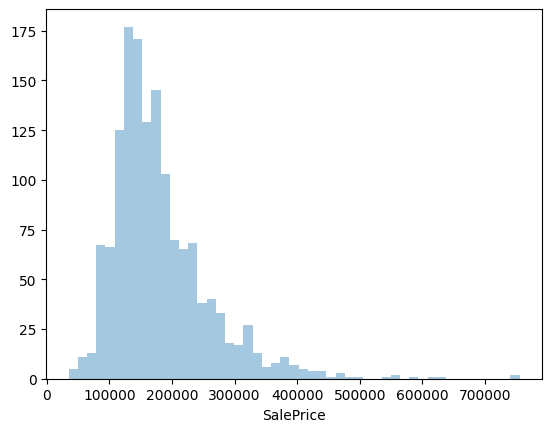

In [12]:
sns.distplot(train_df.get("SalePrice"), kde=False)
plt.show()

The histogram shows a right-skewed distribution, where most houses



are priced between $100,000  and  $200,000.
A small number of houses are significantly more expensive (outliers), which likely influence the mean.

The right skew suggests applying a log transformation to normalize SalePrice before modeling.

<Axes: ylabel='SalePrice'>

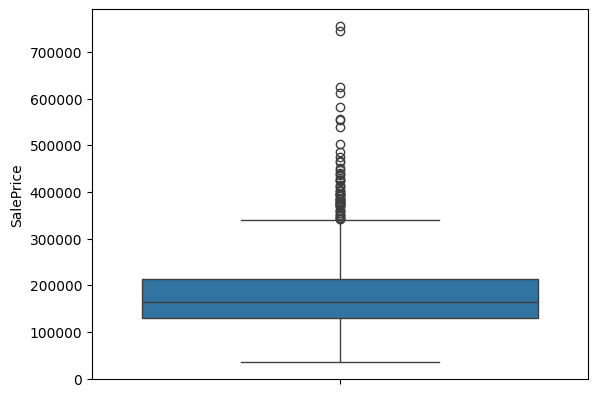

In [13]:
sns.boxplot(train_df['SalePrice'])

In [14]:
# Positive Skeweness:
train_df['SalePrice'].skew()

1.8828757597682129

The boxplot shows that the majority of house prices are concentrated around $129,975 (25th percentile) to $214,000 (75th percentile), with a median of $163,000.
The interquartile range (IQR) reflects moderate variability in house prices.

There are several significant outliers above $300,000.

The most extreme being $755,000, These outliers could skew the results of certain models, especially those sensitive to extreme values (e.g., linear regression).

**Exploring Numerical Columns**


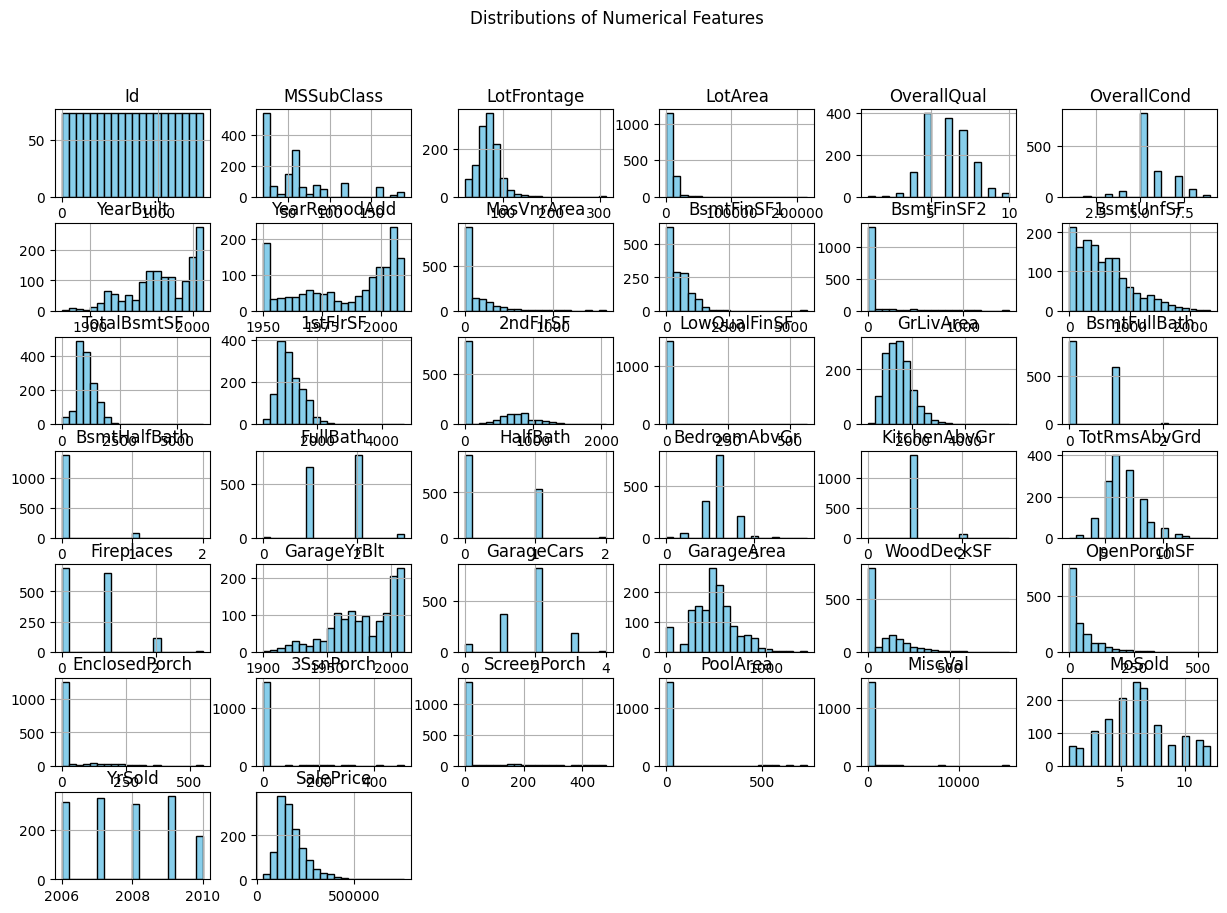

In [15]:
numerical_cols =train_df.select_dtypes(include=['int64', 'float64']).columns
train_df[numerical_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numerical Features")
plt.show()


* Many features (e.g., LotArea, BsmtFinSF1, GarageArea) exhibit right-skewed distributions, indicating a few high values (outliers).
* Features like OverallQual, OverallCond, and GarageCars are more discrete, with limited unique values, representing categorical-like numerical variables.

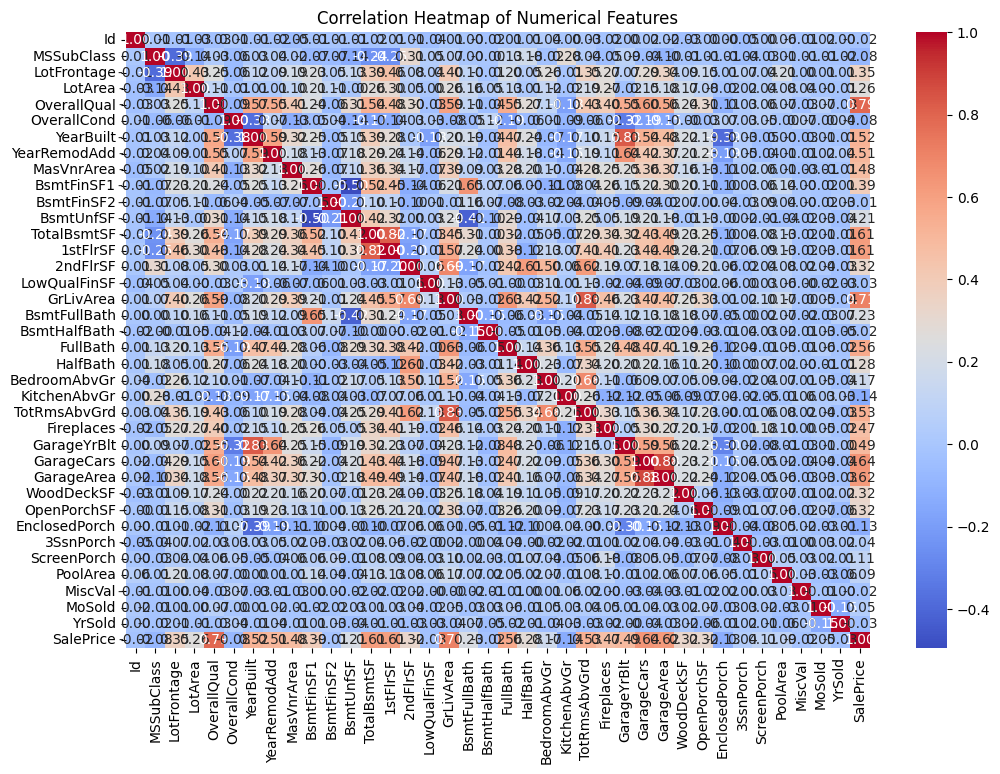

In [16]:
corr_matrix = train_df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [17]:
abs_correlations = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

print("All Correlations with SalePrice (Sorted by Absolute Value):")
print(abs_correlations)


All Correlations with SalePrice (Sorted by Absolute Value):
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
Bsmt

* Top Predictors: OverallQual (0.79), GrLivArea (0.71), GarageCars (0.64), GarageArea (0.62), and TotalBsmtSF (0.61) strongly correlate with SalePrice. Focus on these features during modeling.
* Moderate Predictors: Features like 1stFlrSF, FullBath, and TotRmsAbvGrd moderately impact prices.
* Weak Predictors: Features such as MiscVal (0.021190) and YrSold (0.028923) have little to no impact or negative correlation.



Implications: Prioritize top predictors, handle weak ones carefully, and explore transformations for skewed features.

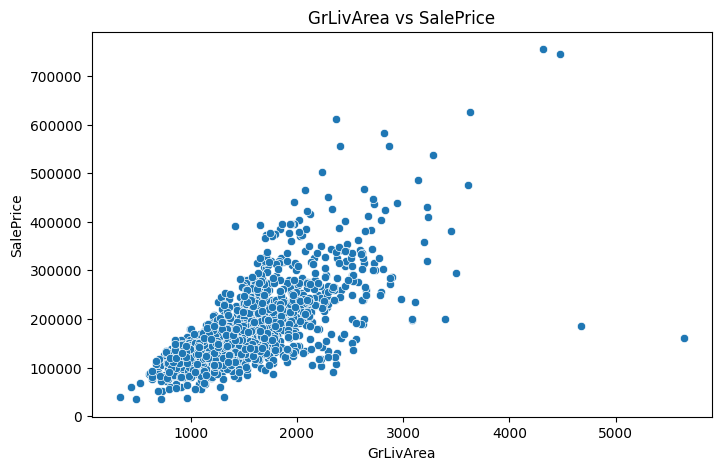

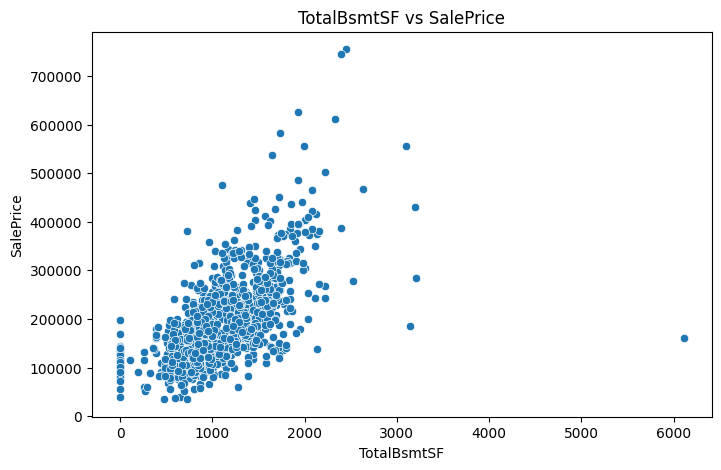

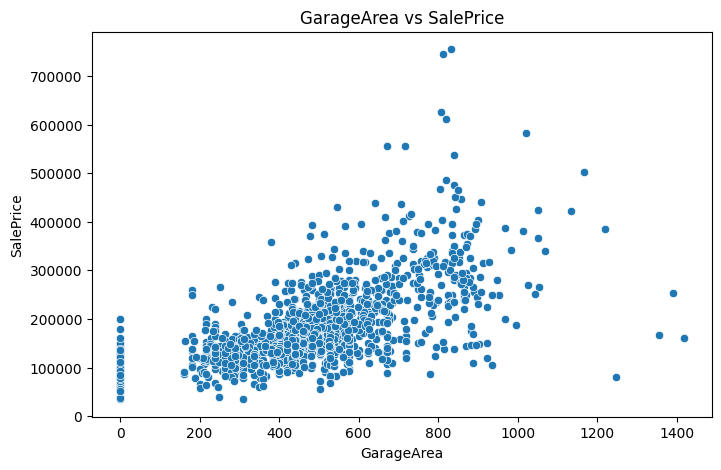

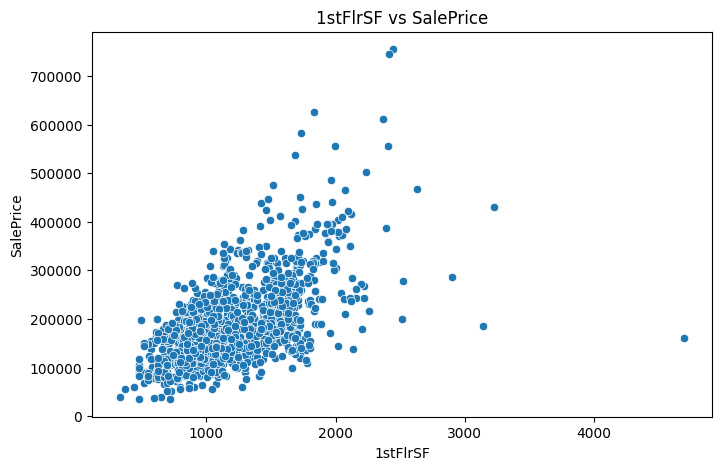

In [18]:
key_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF']
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=train_df[feature], y=train_df['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()


**Categorical Columns**


<ipython-input-19-49c3cc55bce6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i], x=train_df[col], palette="viridis", order=train_df[col].value_counts().index)
<ipython-input-19-49c3cc55bce6>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-19-49c3cc55bce6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i], x=train_df[col], palette="viridis", order=train_df[col].value_counts().index)
<ipython-input-19-49c3cc55bce6>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e.

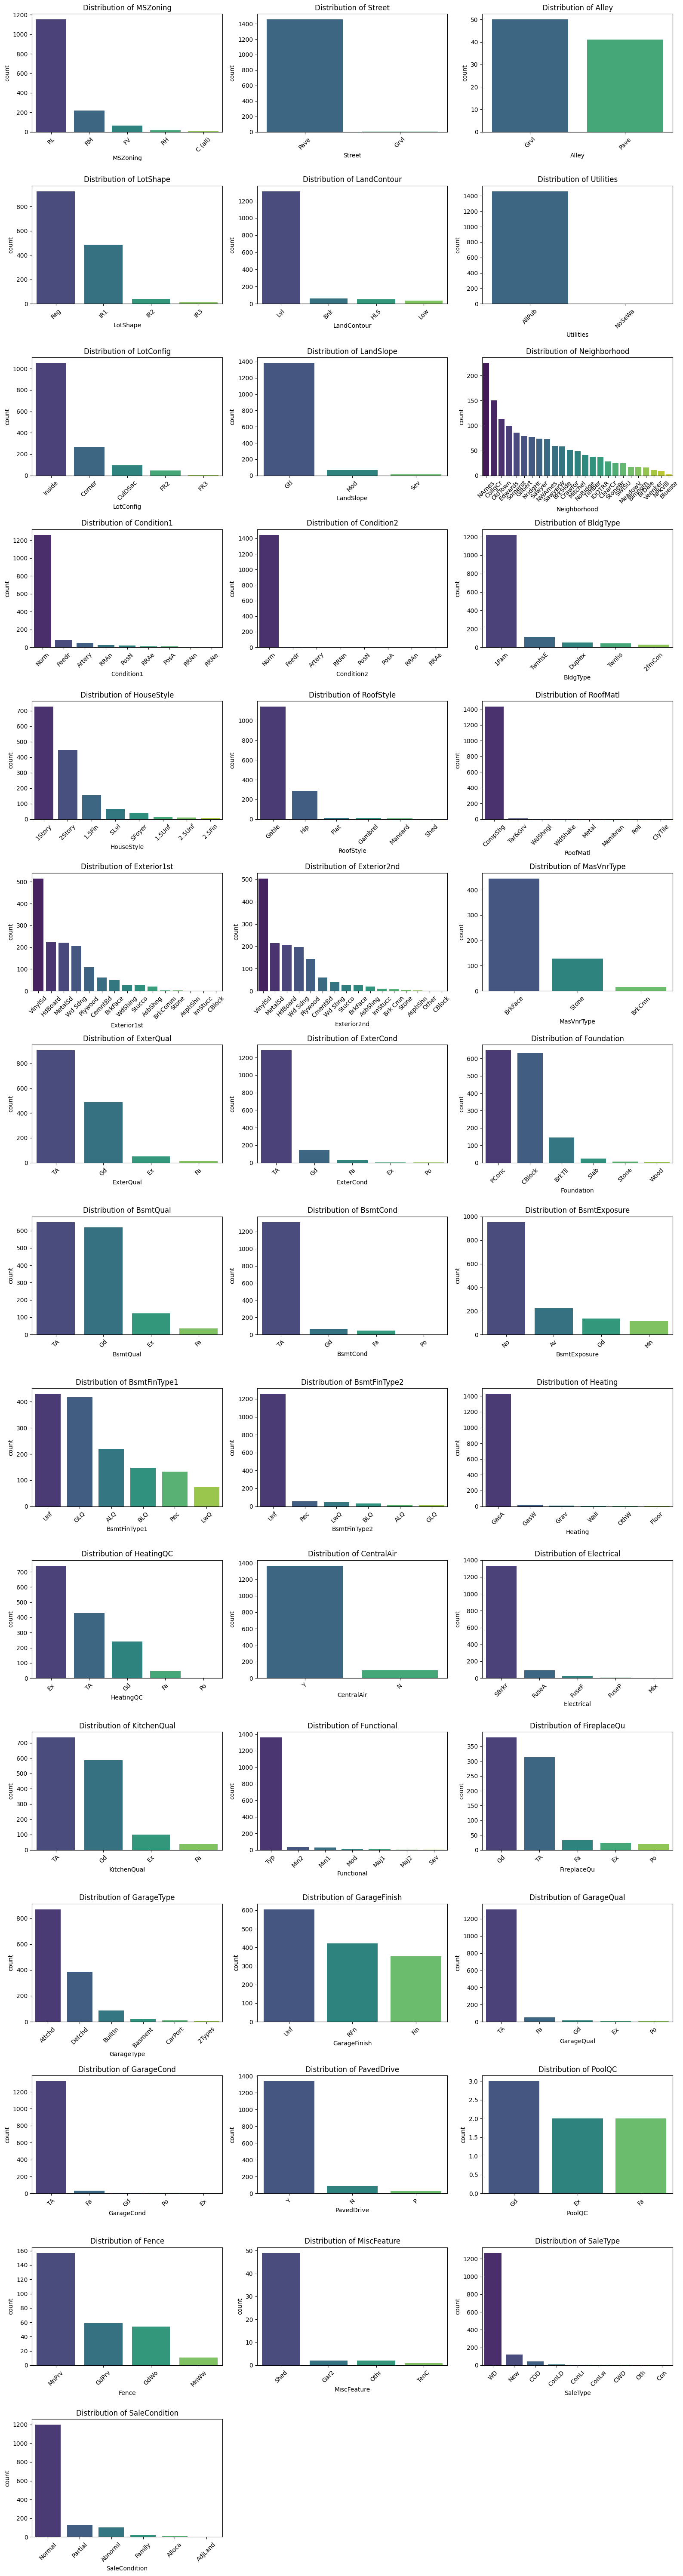

In [19]:
categorical_cols = train_df.select_dtypes(include=['object']).columns

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()


for i, col in enumerate(categorical_cols):
    sns.countplot(ax=axes[i], x=train_df[col], palette="viridis", order=train_df[col].value_counts().index)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])  # Remove empty subplots


plt.tight_layout()
plt.show()



* Features like MSZoning, Neighborhood, and LotShape show good variability and are likely strong predictors for house prices.
* Features like Utilities and Street might have limited predictive power and could be excluded or transformed.

<ipython-input-20-5fa08360d131>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=train_df[col], y=train_df['SalePrice'], palette="coolwarm")
<ipython-input-20-5fa08360d131>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-20-5fa08360d131>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=train_df[col], y=train_df['SalePrice'], palette="coolwarm")
<ipython-input-20-5fa08360d131>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocat

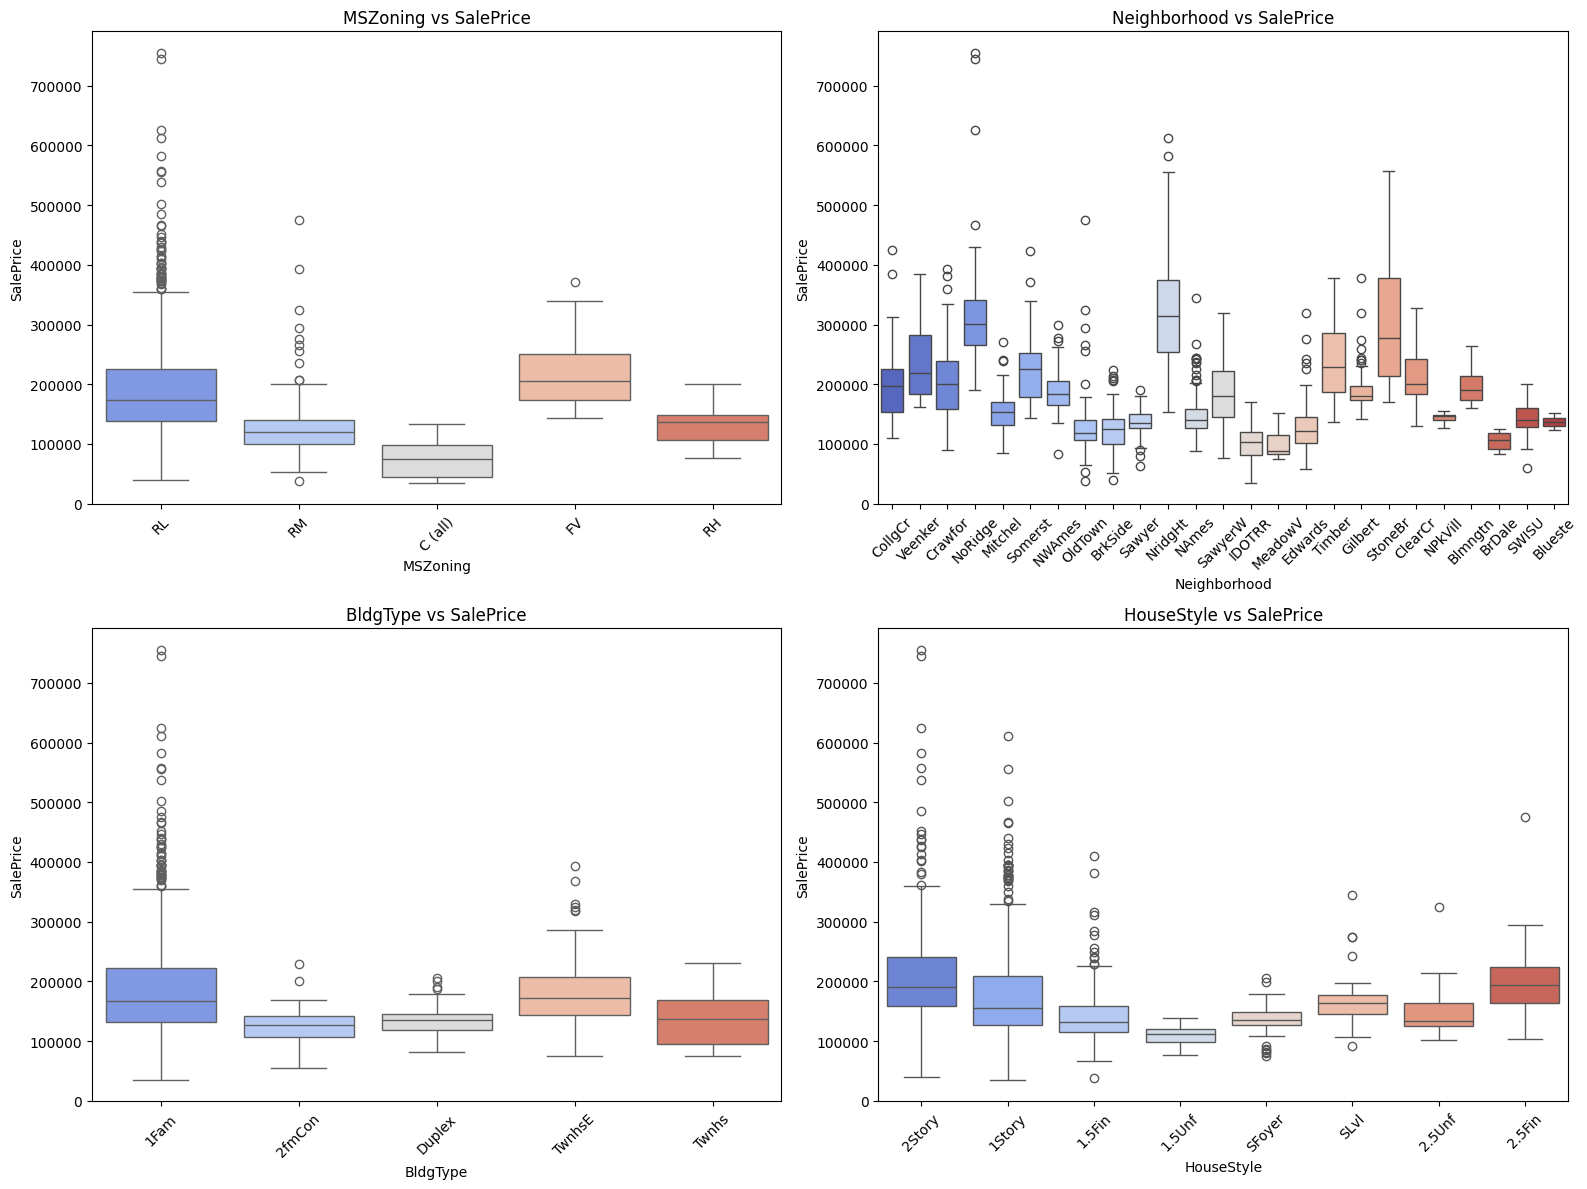

In [20]:
categorical_features = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid of plots
axes = axes.flatten()  # Flatten axes for easier iteration

for i, col in enumerate(categorical_features):
    sns.boxplot(ax=axes[i], x=train_df[col], y=train_df['SalePrice'], palette="coolwarm")
    axes[i].set_title(f"{col} vs SalePrice")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



In [21]:

data = pd.concat((train_df.loc[:,:], test_df.loc[:, :]))
data.shape

(2919, 81)

**Step 3 : Data Cleaning**


We will Merge train and test data for data preprocessing to ensure uniform processing, We will Handle categorical and numerical missing values by  imputing missing values based on feature types and relationships.



**Missing Values**


Imputing Categorical Columns

Before imputing categorical values, it is essential to verify the conditions for missing values using the original numerical data from the raw dataset. For instance, we will check whether the missing values are due to truly missing data or if they represent features that do not exist in certain houses. This distinction ensures that missing values are treated as legitimate data inputs.

In [22]:
def get_cols_with_missing_values_by_type(df):

    total_rows = len(df)
    missing_values = df.isnull().sum()
    missing_columns = missing_values[missing_values > 0]  # Columns with missing values

    missing_percentages = (missing_columns / total_rows) * 100

    numerical_missing = missing_columns.index.intersection(df.select_dtypes(include=['int64', 'float64']).columns)
    categorical_missing = missing_columns.index.intersection(df.select_dtypes(include=['object']).columns)
    other_missing = missing_columns.index.difference(numerical_missing.union(categorical_missing))

    return {
        "Numerical": pd.DataFrame({
            "Count": missing_columns[numerical_missing],
            "Percentage": missing_percentages[numerical_missing]
        }).sort_values(by="Count", ascending=False),
        "Categorical": pd.DataFrame({
            "Count": missing_columns[categorical_missing],
            "Percentage": missing_percentages[categorical_missing]
        }).sort_values(by="Count", ascending=False),
        "Other": pd.DataFrame({
            "Count": missing_columns[other_missing],
            "Percentage": missing_percentages[other_missing]
        }).sort_values(by="Count", ascending=False)
    }

missing_by_type = get_cols_with_missing_values_by_type(data)

print("Numerical columns with missing values:")
print(missing_by_type["Numerical"])

print("\nCategorical columns with missing values:")
print(missing_by_type["Categorical"])

print("\nOther columns with missing values:")
print(missing_by_type["Other"])


Numerical columns with missing values:
              Count  Percentage
SalePrice      1459   49.982871
LotFrontage     486   16.649538
GarageYrBlt     159    5.447071
MasVnrArea       23    0.787941
BsmtFullBath      2    0.068517
BsmtHalfBath      2    0.068517
BsmtFinSF1        1    0.034258
BsmtFinSF2        1    0.034258
BsmtUnfSF         1    0.034258
TotalBsmtSF       1    0.034258
GarageCars        1    0.034258
GarageArea        1    0.034258

Categorical columns with missing values:
              Count  Percentage
PoolQC         2909   99.657417
MiscFeature    2814   96.402878
Alley          2721   93.216855
Fence          2348   80.438506
MasVnrType     1766   60.500171
FireplaceQu    1420   48.646797
GarageQual      159    5.447071
GarageFinish    159    5.447071
GarageCond      159    5.447071
GarageType      157    5.378554
BsmtCond         82    2.809181
BsmtExposure     82    2.809181
BsmtQual         81    2.774923
BsmtFinType2     80    2.740665
BsmtFinType1     79    

if PoolArea: Pool area in square feet
PoolQC: Pool quality are both related if both are missing values give mssing





In [23]:
# Calculate the most frequent values (modes) for PoolArea and PoolQC
most_frequent_poolqc = data['PoolQC'].mode()[0]


data.loc[data['PoolArea'].isnull() & data['PoolQC'].isnull(), ['PoolQC']] = ["Missing"]


data['PoolQC'].fillna(most_frequent_poolqc, inplace=True)


print("Missing values after imputation:")
print(data[['PoolArea', 'PoolQC']].isnull().sum())

print(data[['PoolArea', 'PoolQC']].head())


Missing values after imputation:
PoolArea    0
PoolQC      0
dtype: int64
   PoolArea PoolQC
0         0     Ex
1         0     Ex
2         0     Ex
3         0     Ex
4         0     Ex


<ipython-input-23-9ec3c55c2a41>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PoolQC'].fillna(most_frequent_poolqc, inplace=True)


MiscFeature


is actually a feature that can have missing as a legit value well as Fence



In [24]:
data[['MiscFeature', 'Fence','Alley','MasVnrType']] = data[['MiscFeature', 'Fence','Alley','MasVnrType']].fillna('Missing')

for col in ['MiscFeature', 'Fence', 'Alley']:
    print(f"Missing values in {col}: {data[col].isnull().sum()}")
    print(data[col].value_counts())
    print("\n")


Missing values in MiscFeature: 0
MiscFeature
Missing    2814
Shed         95
Gar2          5
Othr          4
TenC          1
Name: count, dtype: int64


Missing values in Fence: 0
Fence
Missing    2348
MnPrv       329
GdPrv       118
GdWo        112
MnWw         12
Name: count, dtype: int64


Missing values in Alley: 0
Alley
Missing    2721
Grvl        120
Pave         78
Name: count, dtype: int64




These Categorical can't have missing values as ligit values: we chose the mode method as it is the best one in our case

---



In [25]:

columns_to_impute = [
     'MSZoning', 'Functional', 'Utilities',
    'Exterior2nd', 'Exterior1st', 'KitchenQual', 'Electrical', 'SaleType'
]


for col in columns_to_impute:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)
    print(f"Missing values in {col}: {data[col].isnull().sum()}")
    print(f"Mode of {col}: {mode_value}")
    print(data[col].value_counts())
    print("\n")



Missing values in MSZoning: 0
Mode of MSZoning: RL
MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64


Missing values in Functional: 0
Mode of Functional: Typ
Functional
Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64


Missing values in Utilities: 0
Mode of Utilities: AllPub
Utilities
AllPub    2918
NoSeWa       1
Name: count, dtype: int64


Missing values in Exterior2nd: 0
Mode of Exterior2nd: VinylSd
Exterior2nd
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64


Missing values in Exterior1st: 0
Mode of Exterior1st: VinylSd
Exterior1st
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd  

<ipython-input-25-559b8bf93fc5>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)
<ipython-input-25-559b8bf93fc5>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

For FireplaceQu to have a legit missing value Fireplaces should be = 0

In [26]:

fireplacequ_mode = data['FireplaceQu'].mode()[0]


data.loc[data['Fireplaces'] == 0, 'FireplaceQu'] = 'Missing'  # Assign "Missing" if Fireplaces == 0
data['FireplaceQu'].fillna(fireplacequ_mode, inplace=True)    # Fill remaining with mode

print(f"Missing values in FireplaceQu: {data['FireplaceQu'].isnull().sum()}")
print(data['FireplaceQu'].value_counts())


Missing values in FireplaceQu: 0
FireplaceQu
Missing    1420
Gd          744
TA          592
Fa           74
Po           46
Ex           43
Name: count, dtype: int64


<ipython-input-26-681112828a0c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FireplaceQu'].fillna(fireplacequ_mode, inplace=True)    # Fill remaining with mode


Same Logic to be applied on tha garage related features

In [27]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

for col in garage_columns:
    if data[col].dtype == 'object':  # Check if the column is categorical
        data[col].fillna("Missing", inplace=True)

for col in garage_columns:
    print(f"Missing values in {col}: {data[col].isnull().sum()}")
    if data[col].dtype == 'object':  # Only show value counts for categorical columns
        print(data[col].value_counts())
    print("\n")


Missing values in GarageType: 0
GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Missing     157
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64


Missing values in GarageYrBlt: 159


Missing values in GarageFinish: 0
GarageFinish
Unf        1230
RFn         811
Fin         719
Missing     159
Name: count, dtype: int64


Missing values in GarageCars: 1


Missing values in GarageArea: 1


Missing values in GarageQual: 0
GarageQual
TA         2604
Missing     159
Fa          124
Gd           24
Po            5
Ex            3
Name: count, dtype: int64


Missing values in GarageCond: 0
GarageCond
TA         2654
Missing     159
Fa           74
Gd           15
Po           14
Ex            3
Name: count, dtype: int64




<ipython-input-27-4a48ae370cfb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna("Missing", inplace=True)


In [28]:
basement_columns_categorical = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
basement_columns_numerical = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

for col in basement_columns_categorical:
    # If all basement columns are NaN, set the categorical ones to "Missing"
    data.loc[data[basement_columns_categorical + basement_columns_numerical].isnull().all(axis=1), col] = "Missing"
    # Fill remaining NaN values in categorical columns with the mode
    data[col].fillna(data[col].mode()[0], inplace=True)

for col in basement_columns_categorical:
    print(f"Missing values in {col}: {data[col].isnull().sum()}")
    print(data[col].value_counts())
    print("\n")



Missing values in BsmtQual: 0
BsmtQual
TA         1363
Gd         1209
Ex          258
Fa           88
Missing       1
Name: count, dtype: int64


Missing values in BsmtCond: 0
BsmtCond
TA    2688
Gd     122
Fa     104
Po       5
Name: count, dtype: int64


Missing values in BsmtExposure: 0
BsmtExposure
No    1986
Av     418
Gd     276
Mn     239
Name: count, dtype: int64


Missing values in BsmtFinType1: 0
BsmtFinType1
Unf    930
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64


Missing values in BsmtFinType2: 0
BsmtFinType2
Unf    2573
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64




<ipython-input-28-6d2455b7dcc8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-28-6d2455b7dcc8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

**Handling Missing Values: KNN Imputation**


K-Nearest Neighbors (KNN) Imputation is a method to fill missing values by considering the values of the closest rows in the dataset. The "closeness" is determined using a distance metric (e.g., Euclidean distance) calculated on non-missing features. The missing value is estimated as the average (or weighted average) of the corresponding values from the selected nearest neighbors.




In [29]:

columns_to_impute = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtHalfBath',
                     'BsmtFullBath', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF',
                     'TotalBsmtSF', 'GarageCars', 'GarageArea']

imputation_data = data[columns_to_impute]

knn_imputer = KNNImputer(n_neighbors=5)

imputed_data = knn_imputer.fit_transform(imputation_data)

imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Replace the imputed columns in the original dataset
data[columns_to_impute] = imputed_df

print(data[columns_to_impute].isnull().sum())

LotFrontage     0
GarageYrBlt     0
MasVnrArea      0
BsmtHalfBath    0
BsmtFullBath    0
BsmtFinSF2      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
GarageCars      0
GarageArea      0
dtype: int64


**Final verification of missing values**

In [30]:

missing_values = data.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0]

if missing_columns.empty:
    print("No missing values in the dataset!")
else:
    print("Columns with missing values:")
    print(missing_columns)



Columns with missing values:
SalePrice    1459
dtype: int64


In [31]:
data.drop('Id', axis=1, inplace=True)


In [32]:
data.shape


(2919, 80)

In [33]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC    Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0     Ex  Missing     Missing   
1         Lvl    AllPub       FR2  ...        0     Ex  Missing     Missing   
2         Lvl    AllPub    Inside  ...        0     Ex  Missing     Missing   
3         Lvl    AllPub    Corner  ...        0     Ex  Missing     Missing   
4         Lvl    AllPub       FR2  ...        0     Ex  Missing     Missing   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal   208500.0  
1       0      5    2007        WD         Normal   181500.0  
2       0      9    2008        WD         Normal   223500.0  
3       0      2    2006        WD        Abnorml   140000.0  
4       0     12    2008        WD         Normal   250000.0  

[5 rows x 80 columns]

**Treating Outliers**


Z-Score Threshold Explanation for the Report
The Z-score threshold is used to detect and handle outliers in a dataset. Here's a concise explanation:

What is a Z-Score?

A Z-score measures how many standard deviations a data point is from the mean of the dataset. It is calculated as:


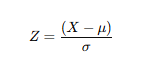




Where:
* 𝑋: The data point.

* 𝜇: The mean of the dataset.

* 𝜎: The standard deviation of the dataset.
Threshold Selection:

A threshold of 3 is commonly used, meaning any data point with a Z-score above 3 or below -3 is considered an outlier. This corresponds to approximately 99.7% of data falling within this range in a normal distribution (according to the empirical rule).
Why Use Z-Score?

Simple and Intuitive: Easy to compute and understand.
Effective: Identifies extreme deviations from the dataset's central tendency.
Purpose:

Applying the Z-score threshold helps in detecting and addressing outliers that could distort the results of statistical analysis or machine learning models.
This method ensures the dataset is free from anomalies while preserving the integrity of the data distribution.

<ipython-input-34-04b5522f3bd3>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16, 4))


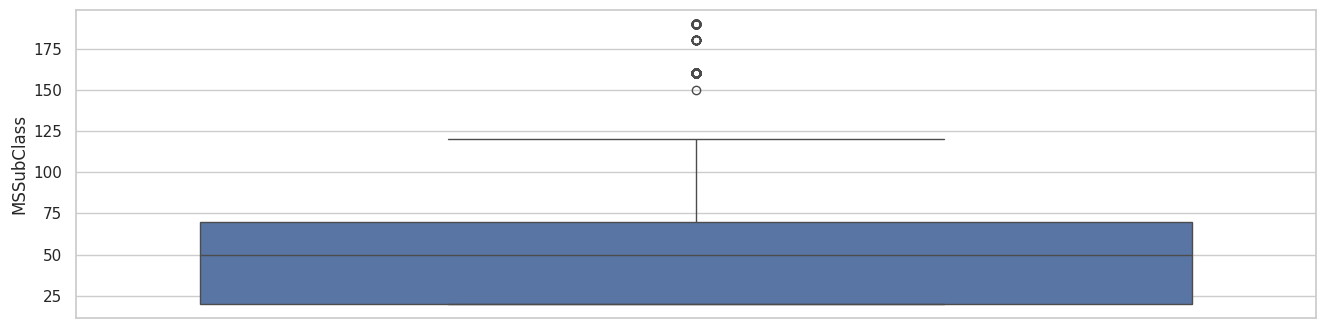

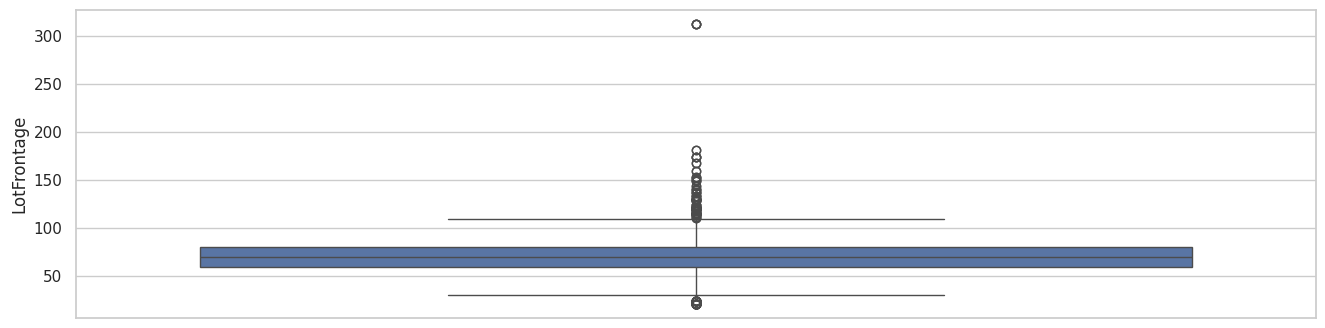

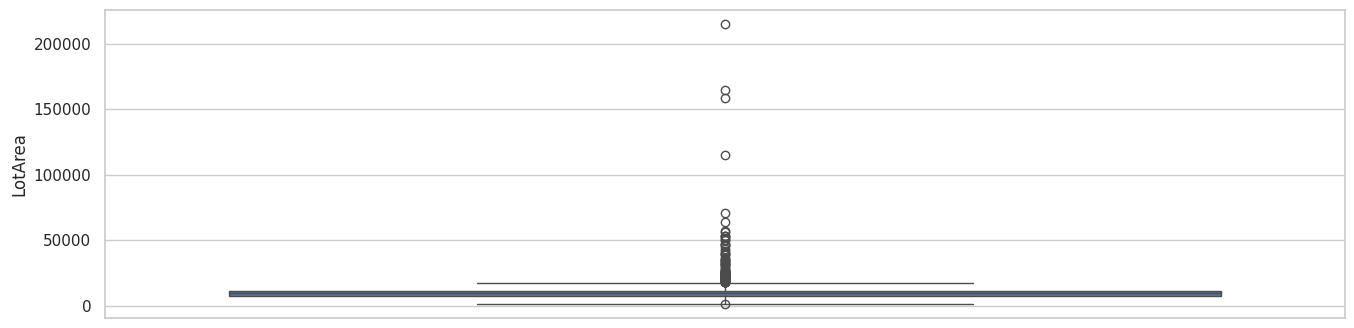

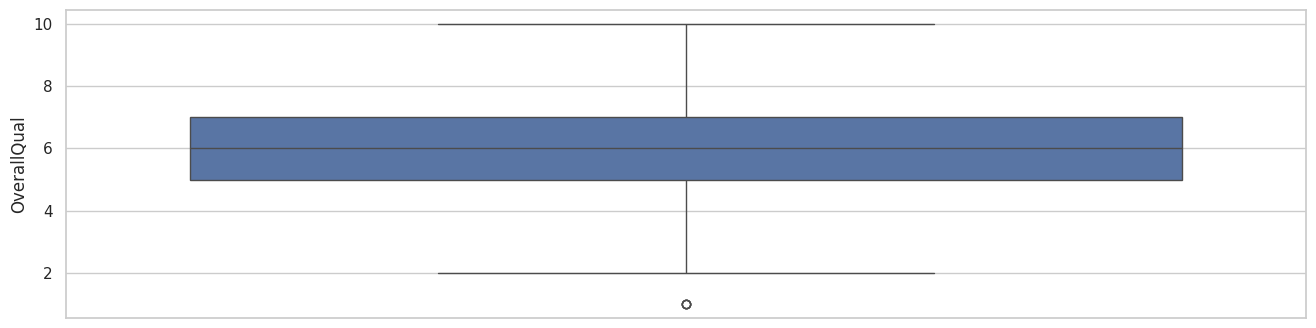

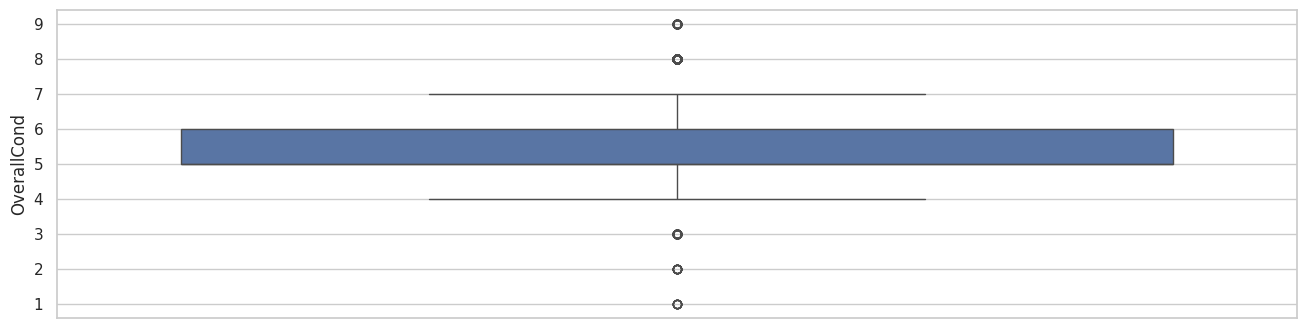

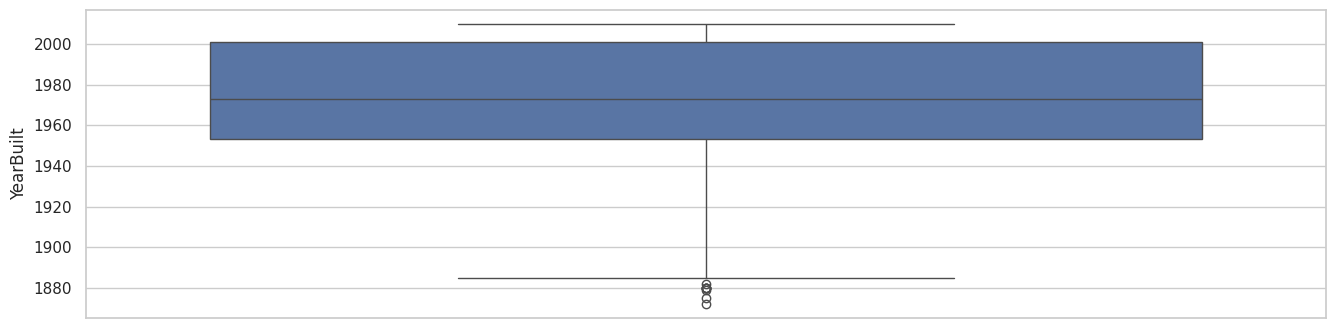

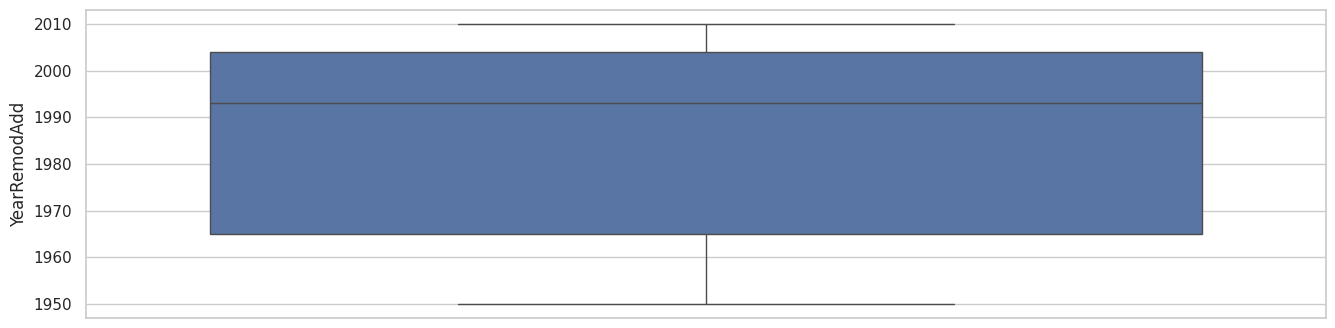

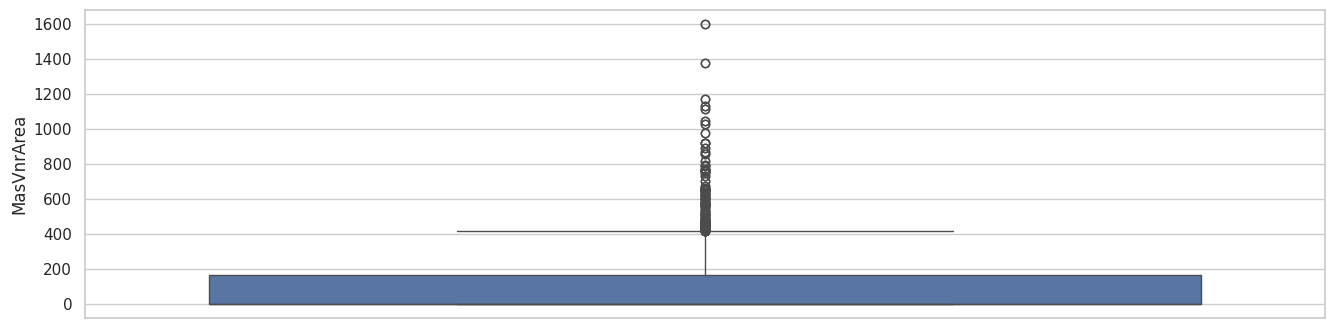

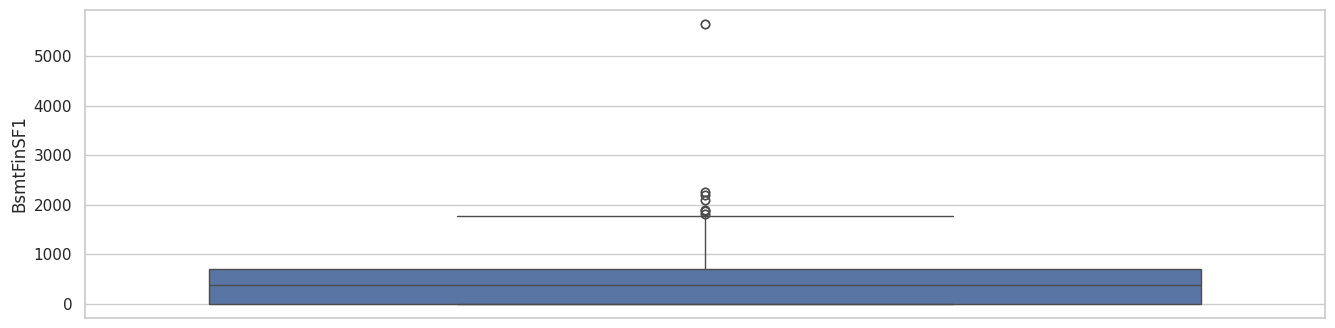

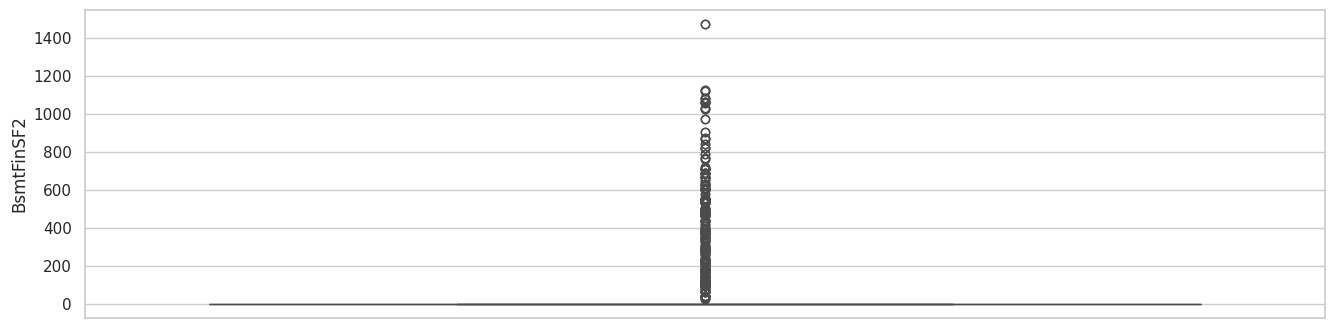

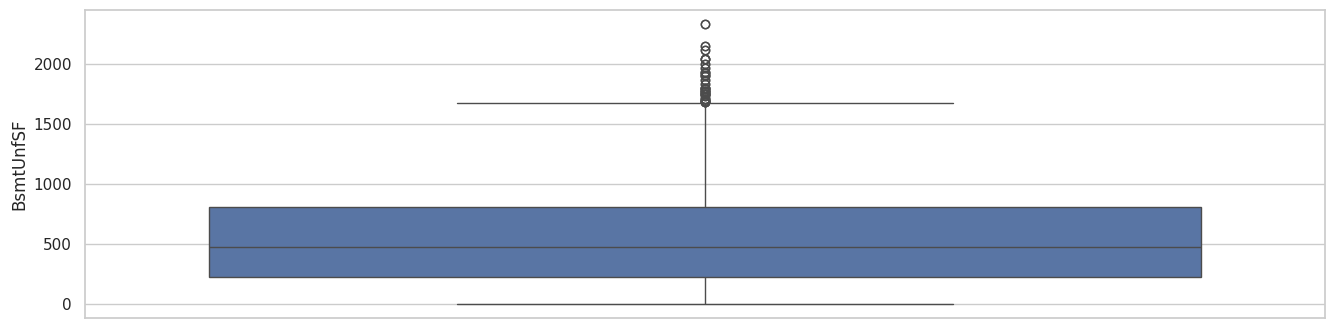

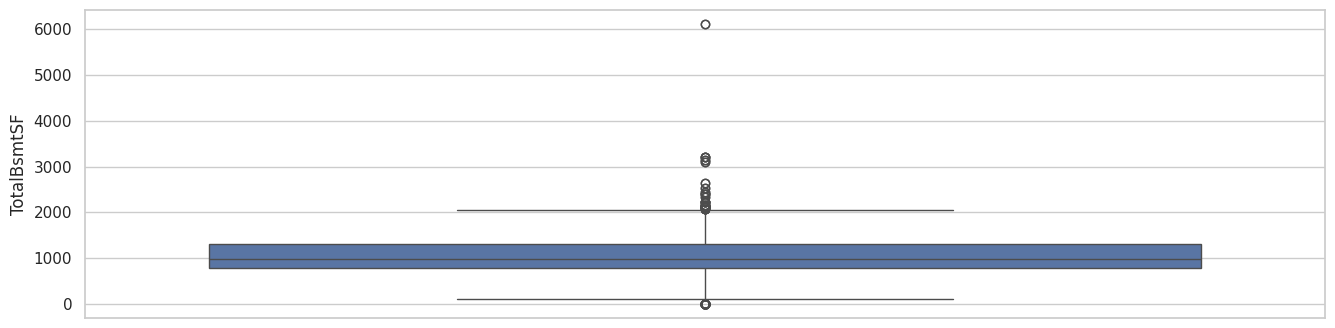

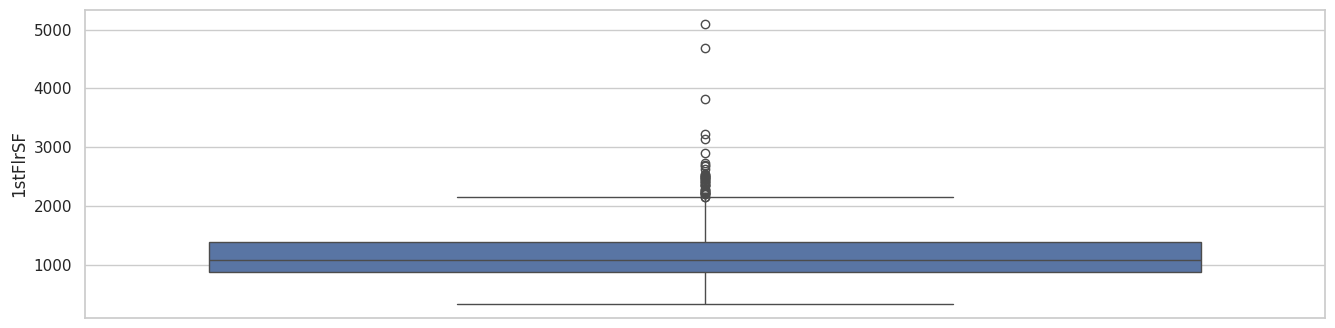

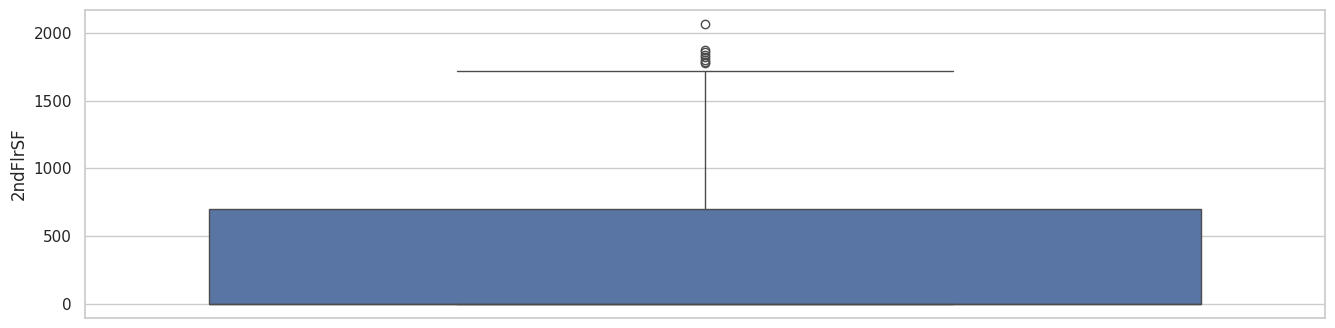

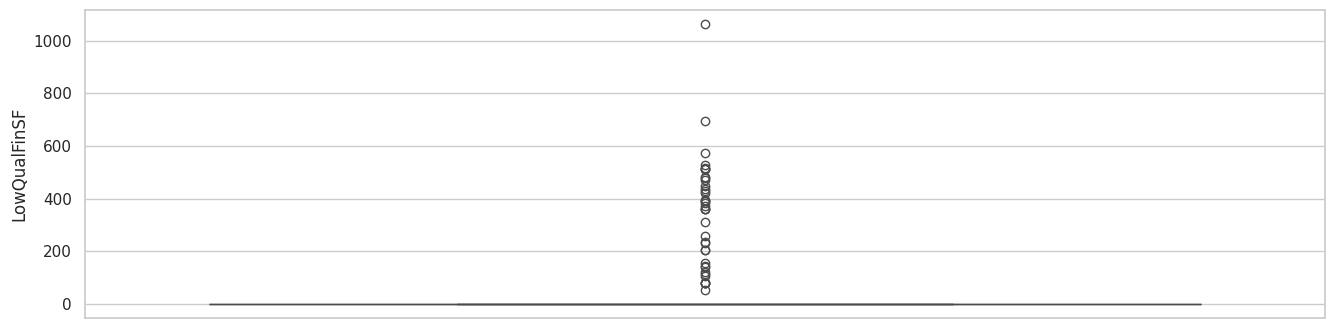

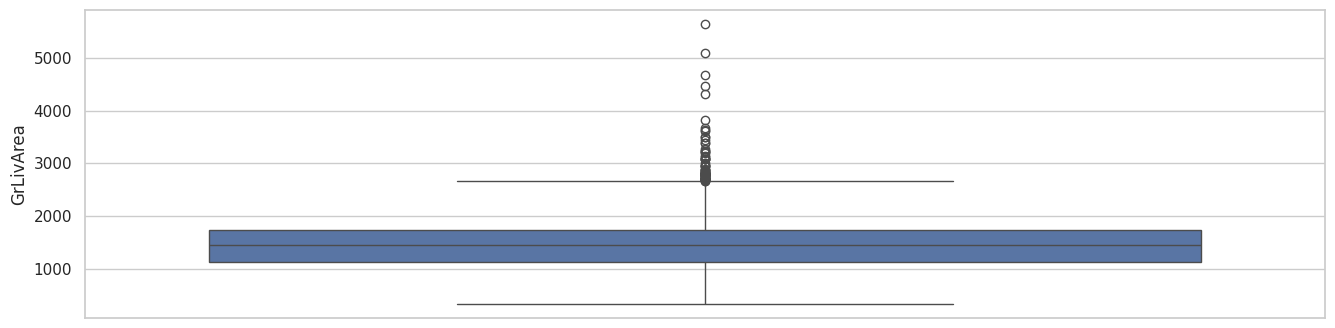

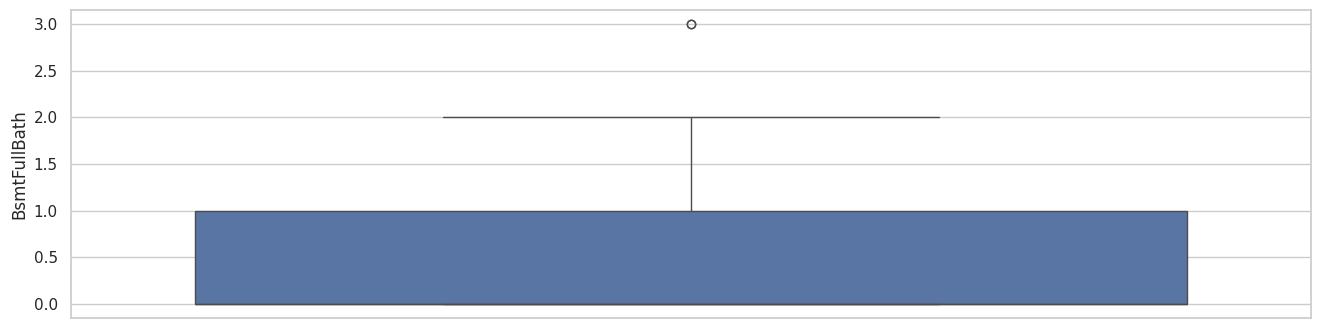

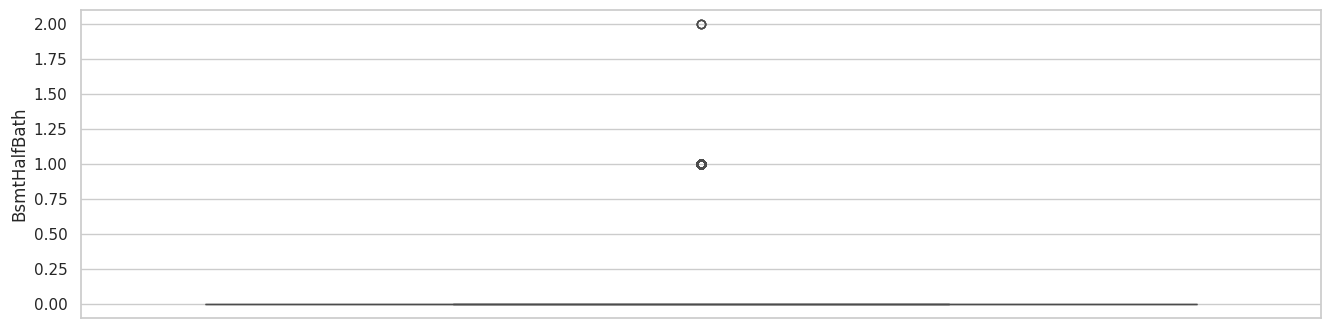

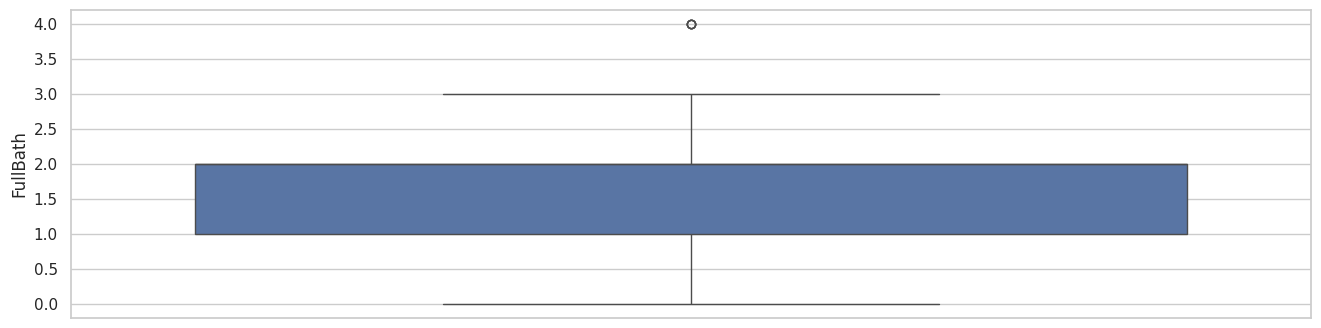

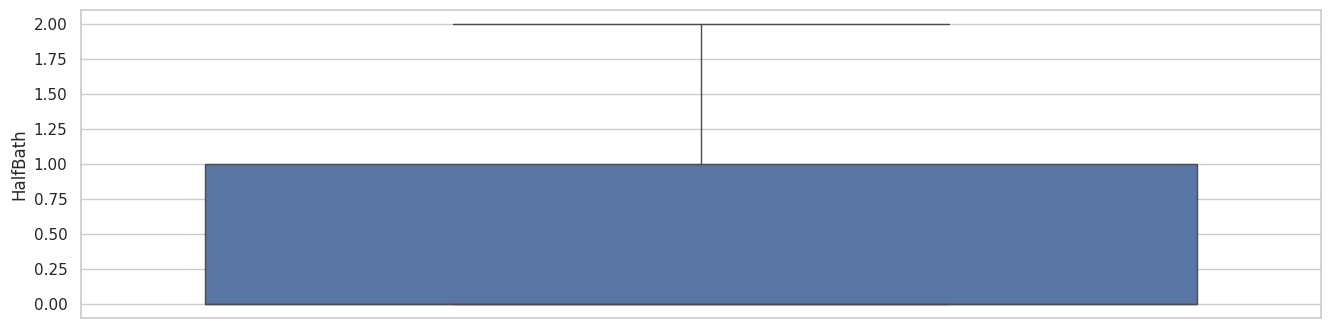

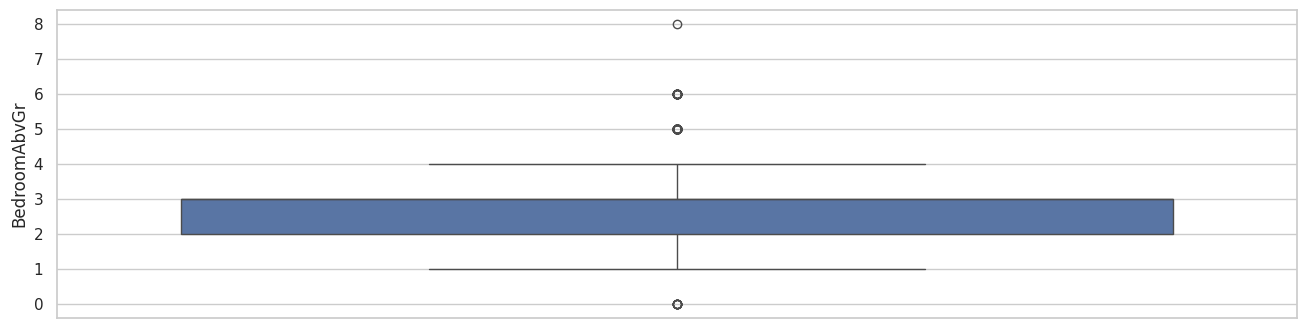

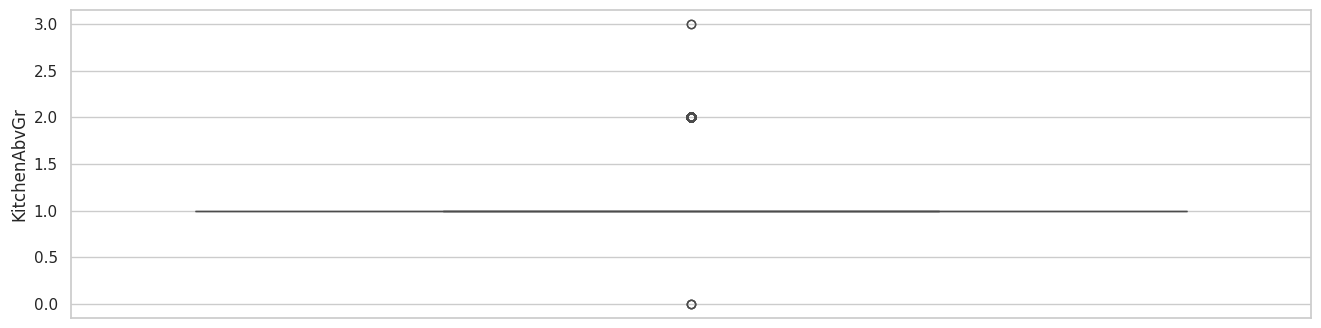

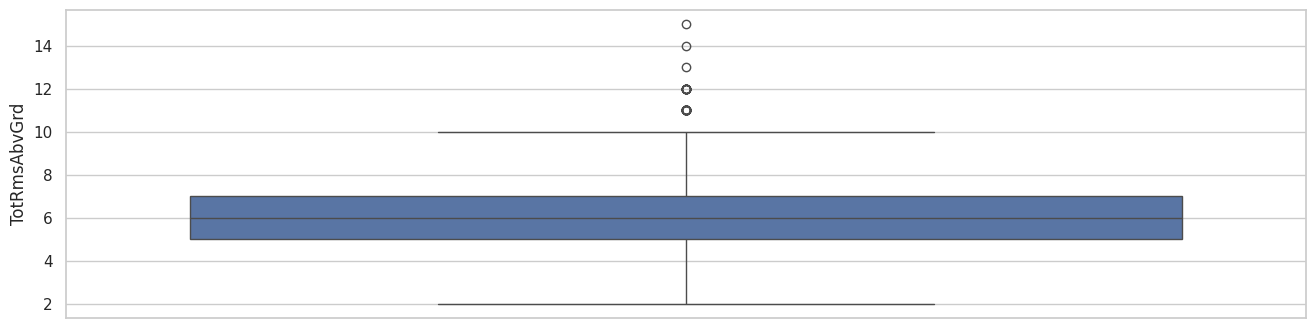

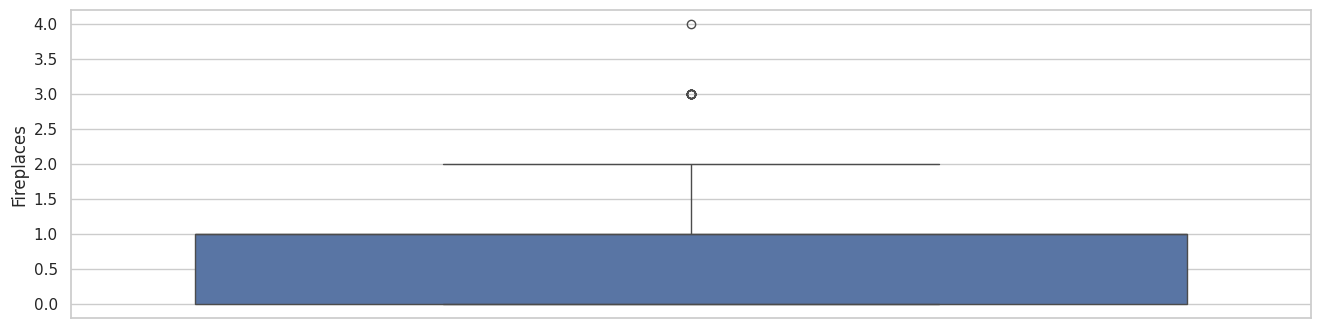

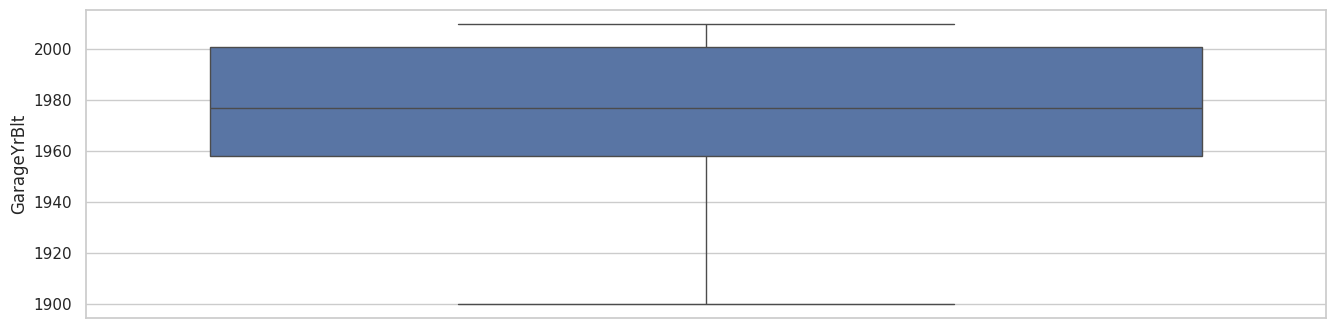

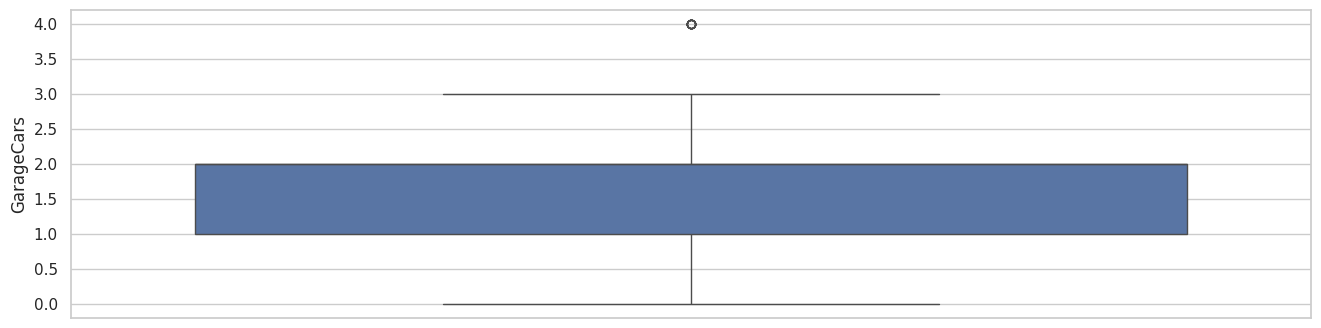

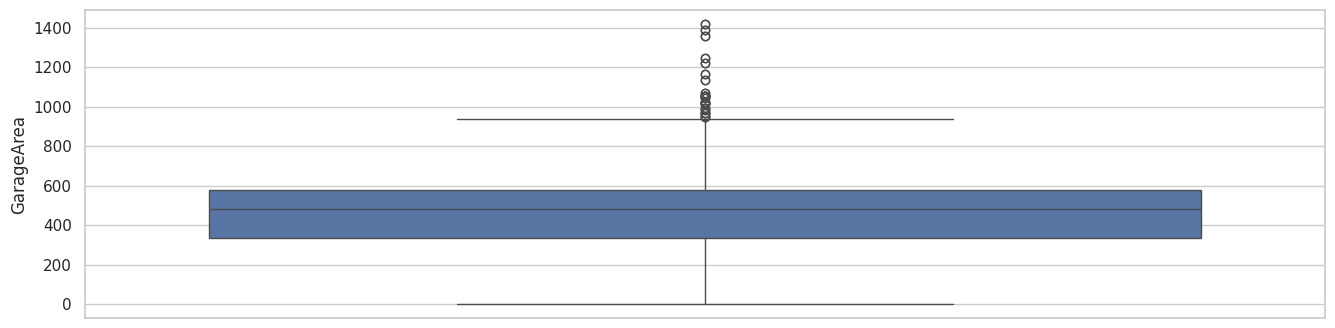

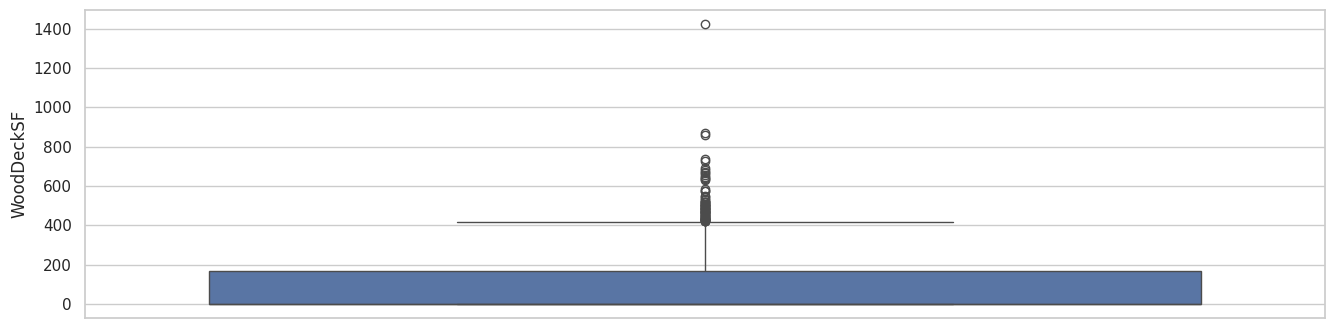

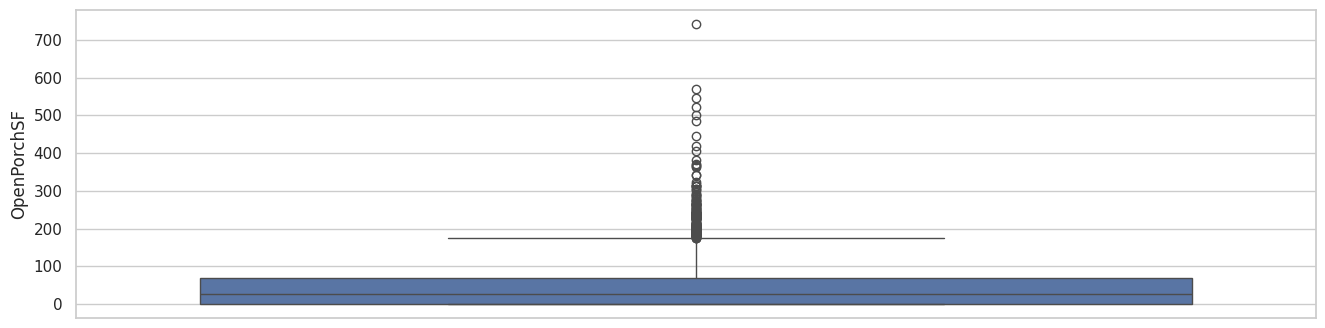

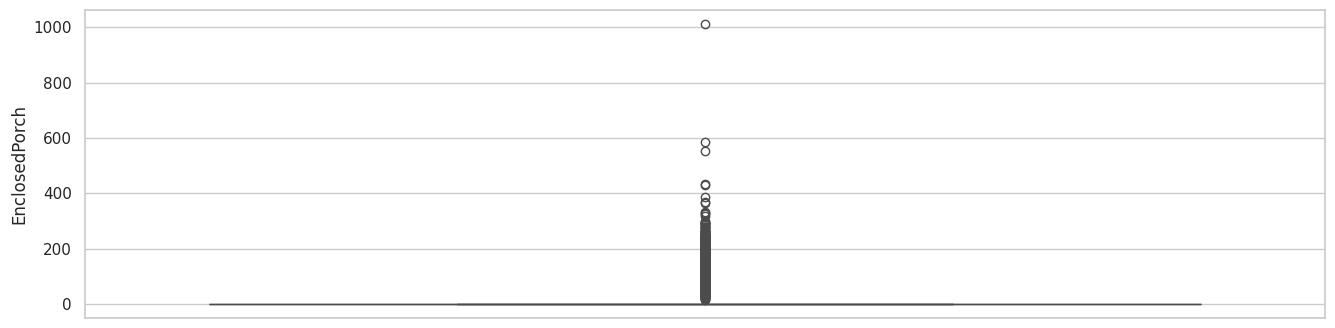

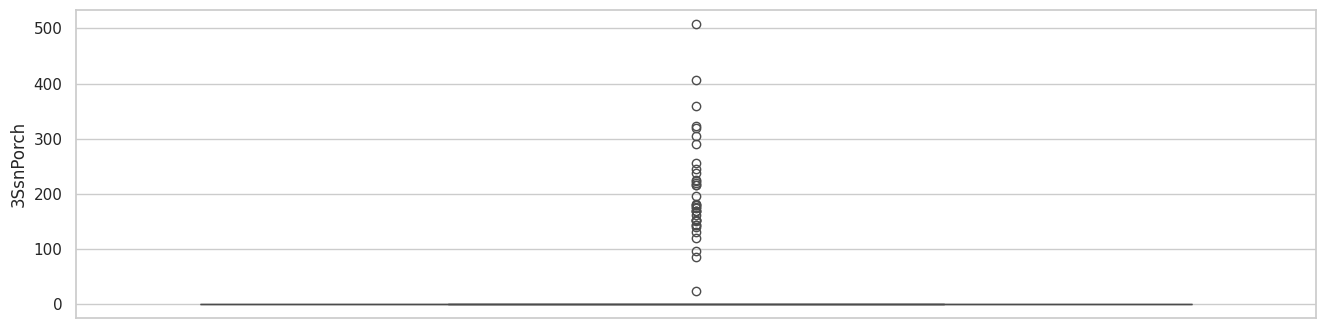

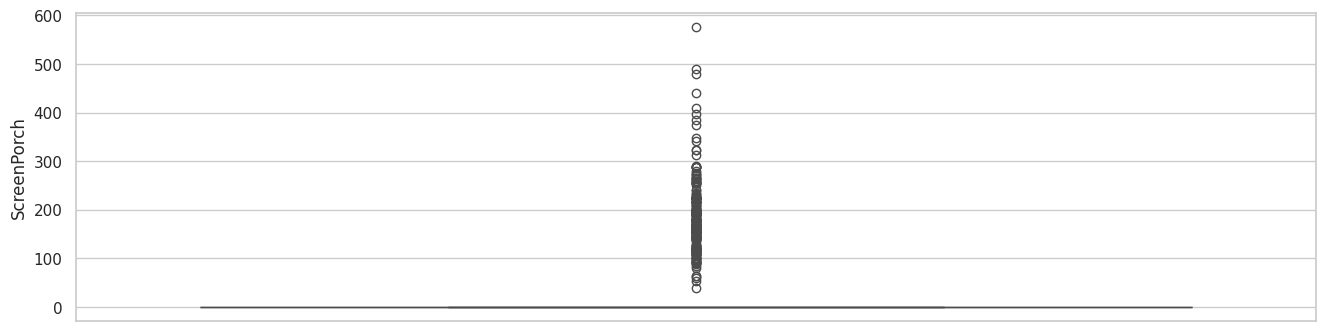

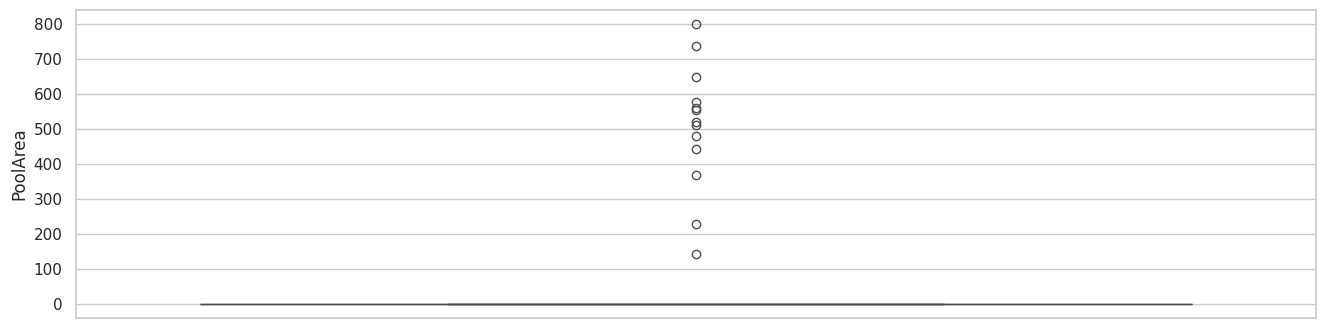

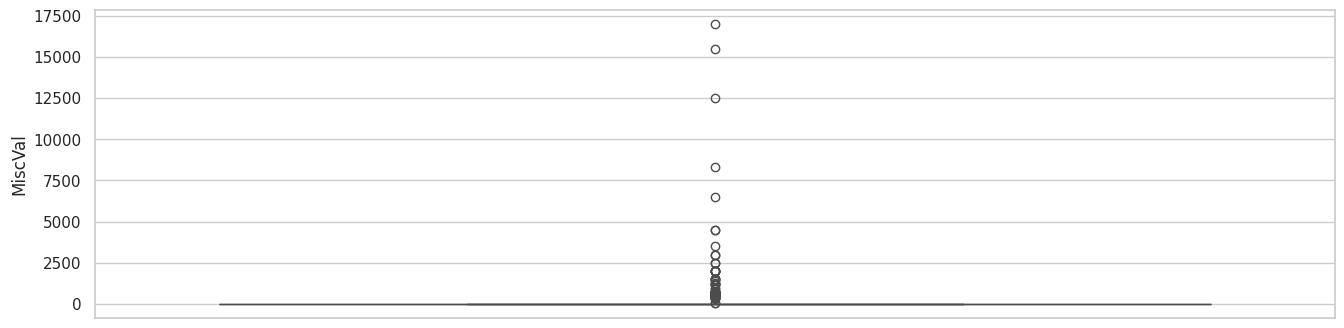

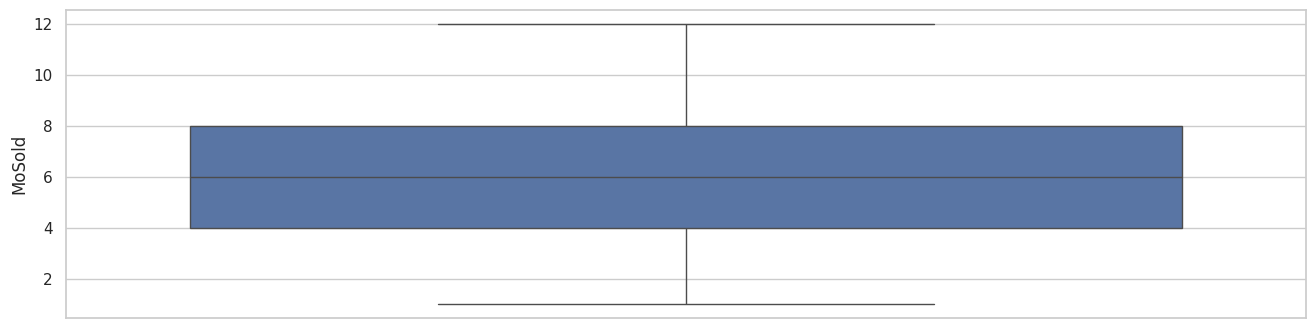

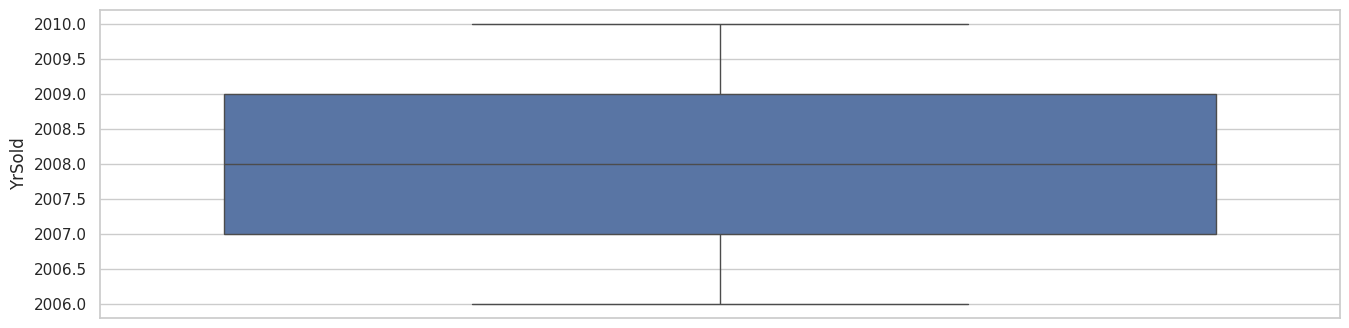

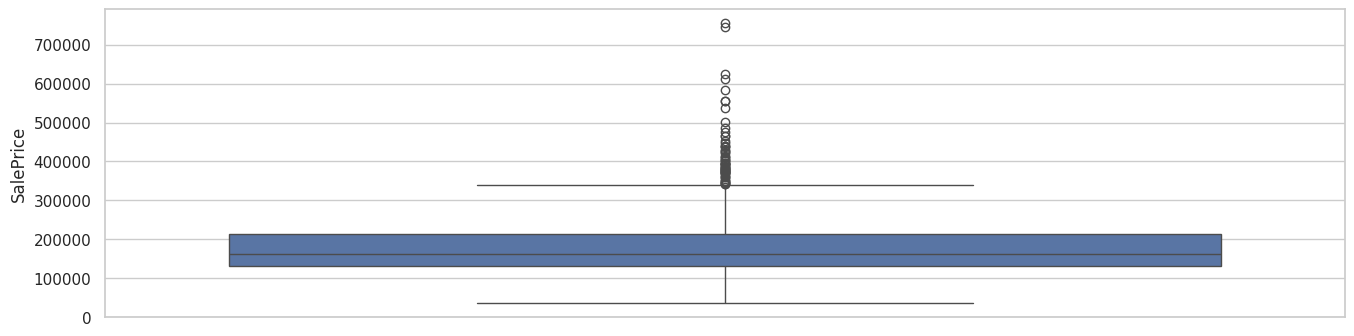

In [34]:

numerical_df = data.select_dtypes(exclude=['object'])

for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])


By analyzing and choosing to retain most outliers as legitimate variations, the dataset retains its richness and diversity, ensuring the model is trained on a comprehensive range of housing characteristics. This approach enhances the model's robustness and its ability to generalize to real-world scenarios.

---



**Feature Engineering**

 Date-related columns

In [35]:
data['GarageYrBlt'] = data['GarageYrBlt'].astype('int')

data['GarageYrBlt'] = data['YrSold'] - data['GarageYrBlt']

data['YearBuilt'] = data['YrSold'] - data['YearBuilt']

data['YearRemodAdd'] = data['YrSold'] - data['YearRemodAdd']

data.drop(['YrSold', 'MoSold'], axis=1, inplace=True)



Basement-related columns:

In [36]:

data['TotalBsmtFinishedSF'] = data['BsmtFinSF1'] + data['BsmtFinSF2']

data['TotalBsmtArea'] = data['TotalBsmtFinishedSF'] + data['BsmtUnfSF']

data.drop(['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

data['TotalFlrSF'] = data['1stFlrSF'] + data['2ndFlrSF']

# Drop the individual floor area columns
data.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

print(data.head())


   MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig  ... PoolQC    Fence MiscFeature MiscVal  \
0         Lvl    AllPub    Inside  ...     Ex  Missing     Missing       0   
1         Lvl    AllPub       FR2  ...     Ex  Missing     Missing       0   
2         Lvl    AllPub    Inside  ...     Ex  Missing     Missing       0   
3         Lvl    AllPub    Corner  ...     Ex  Missing     Missing       0   
4         Lvl    AllPub       FR2  ...     Ex  Missing     Missing       0   

  SaleType SaleCondition  SalePrice  TotalBsmtFinishedSF  TotalBsmtArea  \
0       WD       

In [37]:
data.head

<bound method NDFrame.head of       MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0             60       RL         65.0     8450   Pave  Missing      Reg   
1             20       RL         80.0     9600   Pave  Missing      Reg   
2             60       RL         68.0    11250   Pave  Missing      IR1   
3             70       RL         60.0     9550   Pave  Missing      IR1   
4             60       RL         84.0    14260   Pave  Missing      IR1   
...          ...      ...          ...      ...    ...      ...      ...   
1454         160       RM         62.0     1936   Pave  Missing      Reg   
1455         160       RM         62.0     1894   Pave  Missing      Reg   
1456          20       RL         85.0    20000   Pave  Missing      Reg   
1457          85       RL         66.0    10441   Pave  Missing      Reg   
1458          60       RL         68.0     9627   Pave  Missing      Reg   

     LandContour Utilities LotConfig  ... PoolQC    Fence MiscFeature MiscVal  \
0            Lvl    AllPub    Inside  ...     Ex  Missing     Missing       0   
1            Lvl    AllPub       FR2  ...     Ex  Missing     Missing       0   
2            Lvl    AllPub    Inside  ...     Ex  Missing     Missing       0   
3            Lvl    AllPub    Corner  ...     Ex  Missing     Missing       0   
4            Lvl    AllPub       FR2  ...     Ex  Missing     Missing       0   
...          ...       ...       ...  ...    ...      ...         ...     ...   
1454         Lvl    AllPub    Inside  ...     Ex  Missing     Missing       0   
1455         Lvl    AllPub    Inside  ...     Ex  Missing     Missing       0   
1456         Lvl    AllPub    Inside  ...     Ex  Missing     Missing       0   
1457         Lvl    AllPub    Inside  ...     Ex    MnPrv        Shed     700   
1458         Lvl    AllPub    Inside  ...     Ex  Missing     Missing       0   

     SaleType SaleCondition  SalePrice  TotalBsmtFinishedSF  TotalBsmtArea  \
0          WD        Normal   208500.0                706.0          856.0   
1          WD        Normal   181500.0                978.0         1262.0   
2          WD        Normal   223500.0                486.0          920.0   
3          WD       Abnorml   140000.0                216.0          756.0   
4          WD        Normal   250000.0                655.0         1145.0   
...       ...           ...        ...                  ...            ...   
1454       WD        Normal        NaN                410.0         1221.0   
1455       WD       Abnorml        NaN                  0.0          953.0   
1456       WD       Abnorml        NaN                953.0         1542.0   
1457       WD        Normal        NaN                275.0         1152.0   
1458       WD        Normal        NaN               1078.0         1078.0   

      TotalFlrSF  
0           1710  
1           1262  
2           1786  
3           1717  
4           2198  
...          ...  
1454        1092  
1455        1092  
1456        1224  
1457         970  
1458        2000  

[2919 rows x 75 columns]>

In [38]:
data.shape

(2919, 75)

we can also treat the living area as a whole for less features and les  noise

In [39]:

print(data.columns)



Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea

Bathroom Features

In [40]:
data['totalbaths'] = data['BsmtFullBath'] + data['FullBath'] + 0.5 * (data['BsmtHalfBath'] + data['HalfBath'])
data.drop(['BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath'], axis=1, inplace=True)
print(data.columns)



Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'SaleTyp

Porch Features:

In [41]:
data['totalporchsf'] = data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['WoodDeckSF']
data.drop(['OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF'], axis=1, inplace=True)
print(data.columns)


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'SaleType', 'SaleCondition', 'SalePrice', 'TotalBsmtFinishedSF',
       'TotalBsmtArea', 

**Feature Transformation**



Detect Skewness: Identifying features with high skewness helps decide whether transformations (e.g., log, square root) are needed to make the data more symmetric

In [42]:
#Identify numerical columns (excluding 'SalePrice')
numerical_cols = [cname for cname in data.columns if data[cname].dtypes != 'object' and cname != 'SalePrice']



In [43]:
# Create a DataFrame to store skewness details
skew_df = pd.DataFrame(numerical_cols, columns=['Feature'])



In [44]:
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(data[feature]))


In [45]:

# Calculate absolute skewness
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)



In [46]:
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)



In [47]:
for feature in skew_df[skew_df['Skewed'] == True]['Feature']:
    if data[feature].min() > 0:
        data[feature] = np.log1p(data[feature])
    else:

        data[feature] = np.sqrt(data[feature].clip(lower=0))



In [48]:

transformed_skew_df = pd.DataFrame(numerical_cols, columns=['Feature'])
transformed_skew_df['Skew'] = transformed_skew_df['Feature'].apply(lambda feature: skew(data[feature]))
transformed_skew_df['Absolute Skew'] = transformed_skew_df['Skew'].apply(abs)
transformed_skew_df['Skewed'] = transformed_skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)



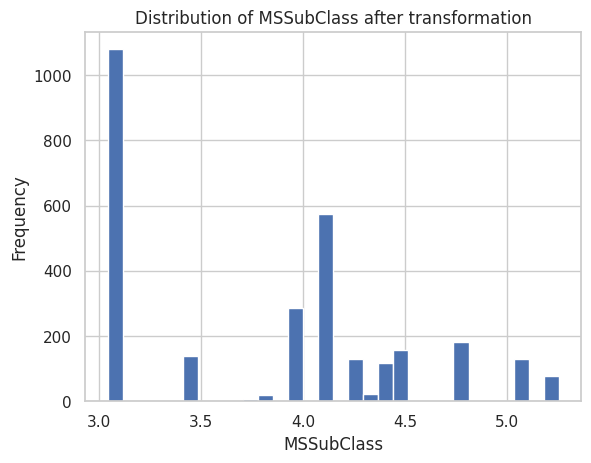

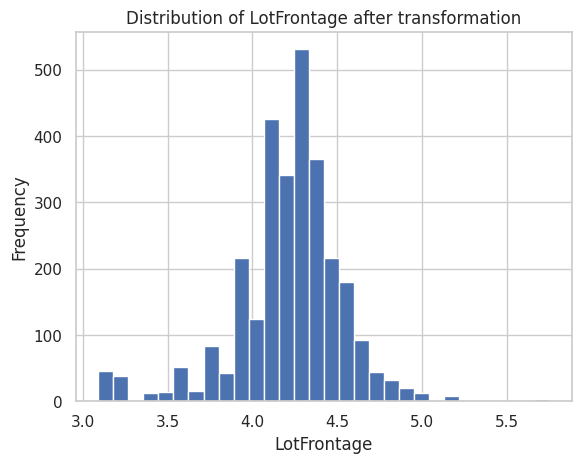

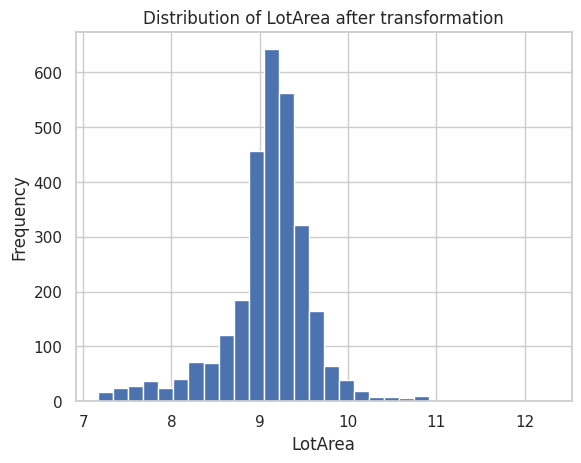

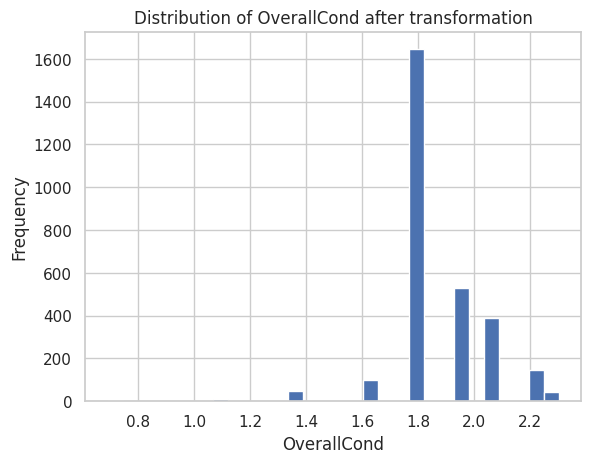

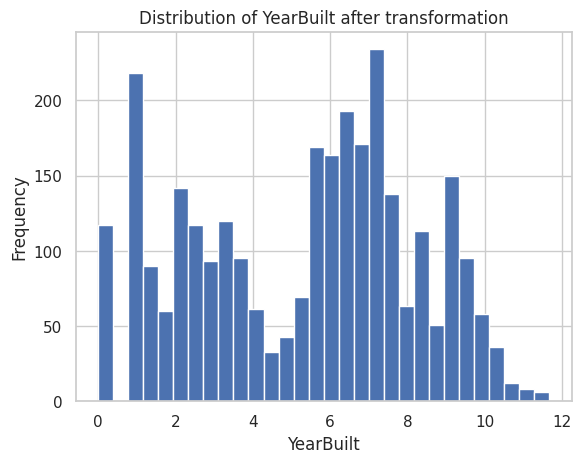

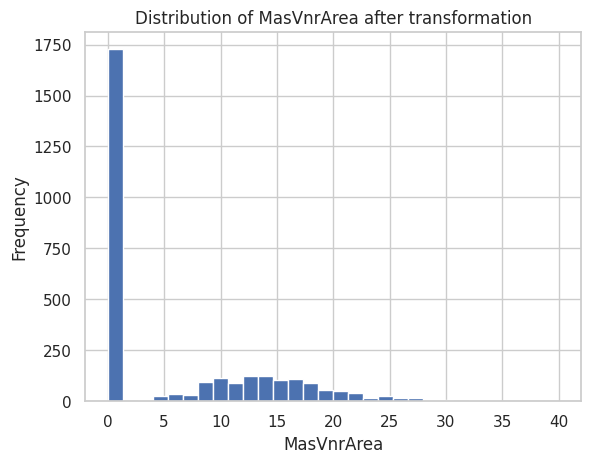

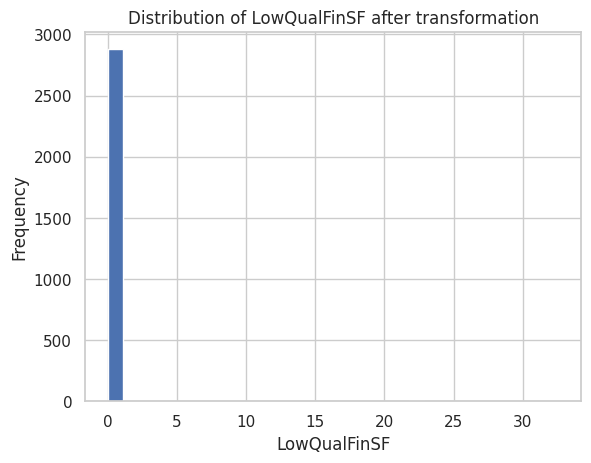

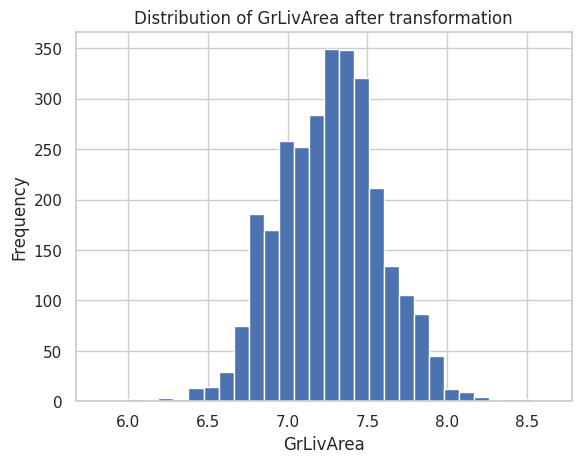

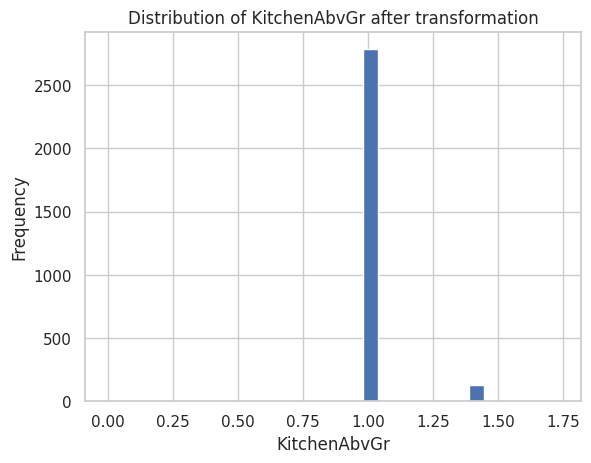

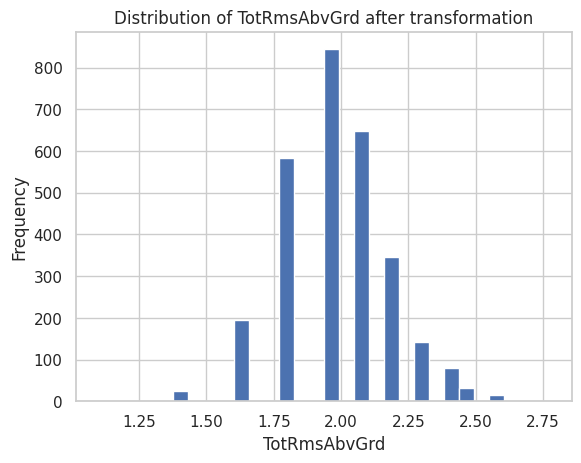

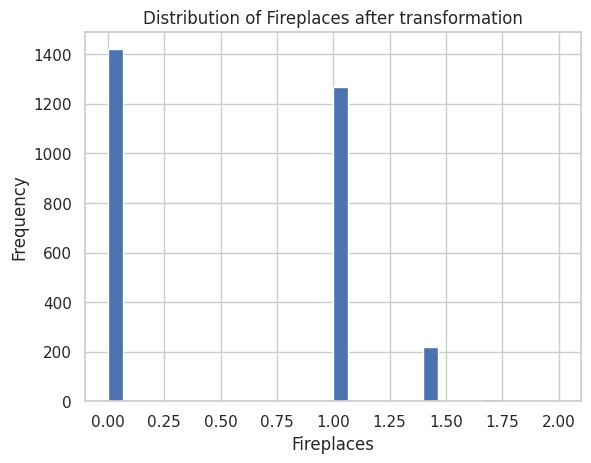

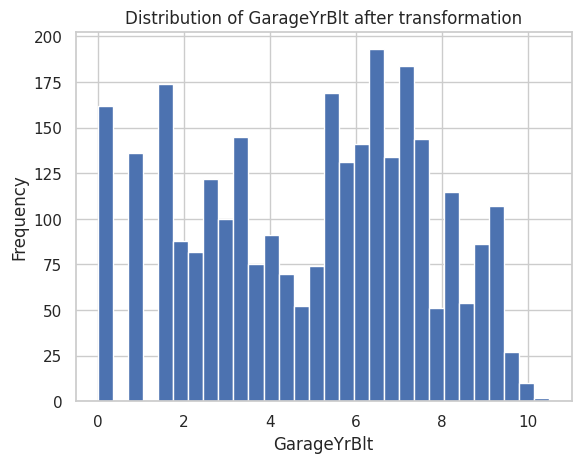

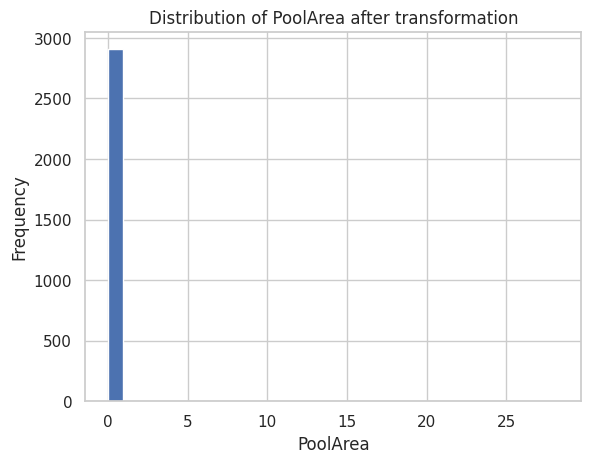

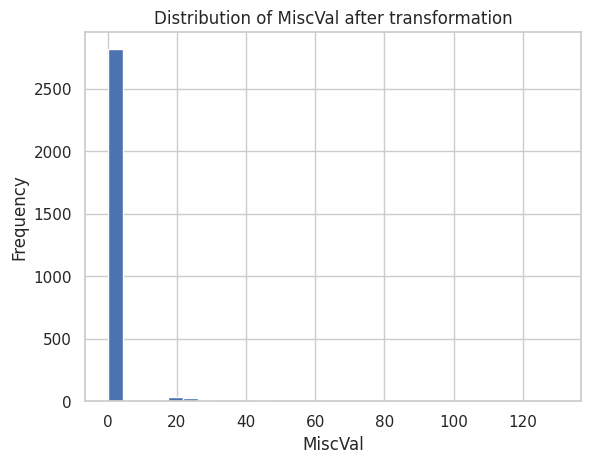

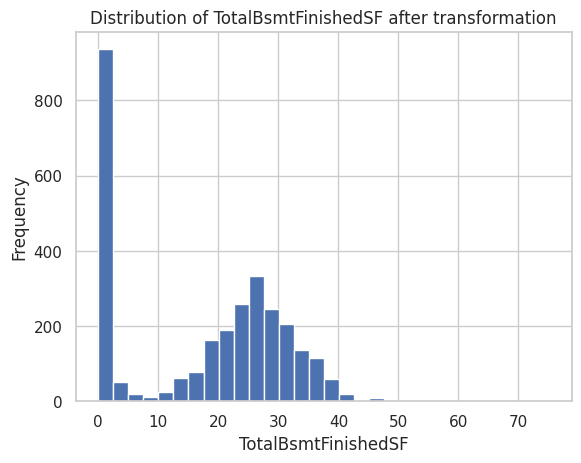

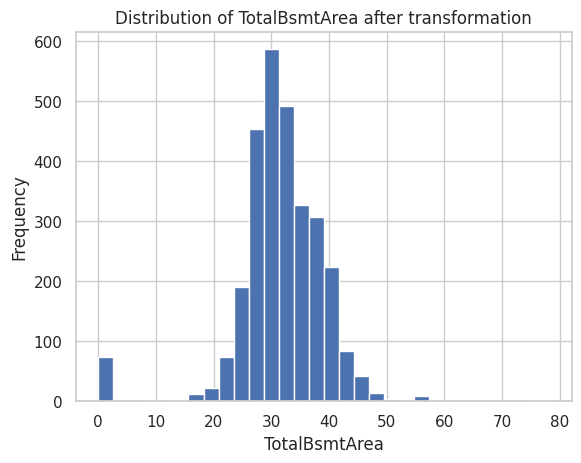

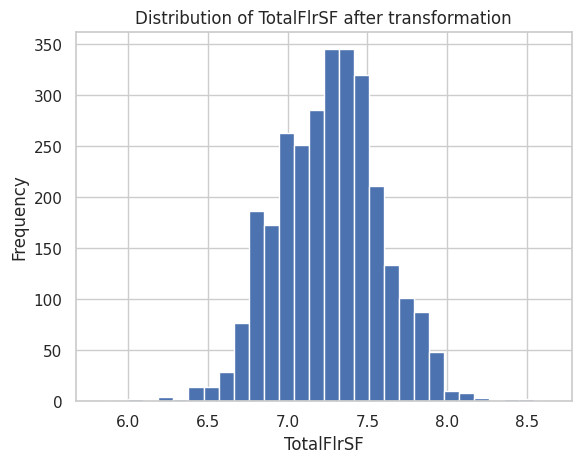

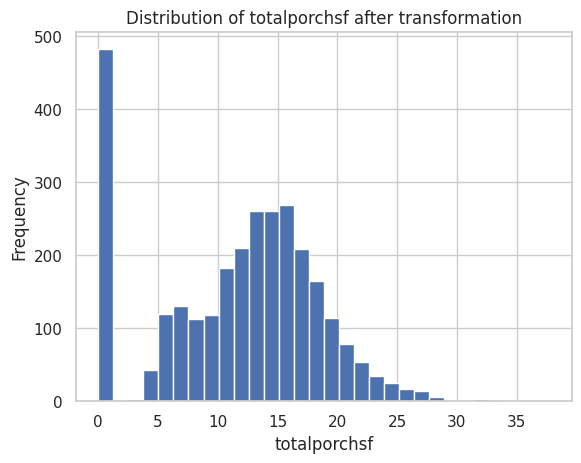

In [49]:

for feature in skew_df[skew_df['Skewed'] == True]['Feature']:
    plt.hist(data[feature], bins=30)
    plt.title(f"Distribution of {feature} after transformation")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()



In [50]:

print("Original Skewness details:")
print(skew_df)

print("\nTransformed Skewness details:")
print(transformed_skew_df)

print("\nTransformed dataset (first 5 rows):")
print(data.head())

Original Skewness details:
                Feature       Skew  Absolute Skew  Skewed
0            MSSubClass   1.375457       1.375457    True
1           LotFrontage   2.182387       2.182387    True
2               LotArea  12.822431      12.822431    True
3           OverallQual   0.197110       0.197110   False
4           OverallCond   0.570312       0.570312    True
5             YearBuilt   0.598609       0.598609    True
6          YearRemodAdd   0.450226       0.450226   False
7            MasVnrArea   2.669043       2.669043    True
8          LowQualFinSF  12.088761      12.088761    True
9             GrLivArea   1.269358       1.269358    True
10         BedroomAbvGr   0.326324       0.326324   False
11         KitchenAbvGr   4.302254       4.302254    True
12         TotRmsAbvGrd   0.758367       0.758367    True
13           Fireplaces   0.733495       0.733495    True
14          GarageYrBlt   0.549246       0.549246    True
15           GarageCars  -0.343008       0.34

**Encode categorical features**


let's start with the colomns that are

In [51]:
data.dtypes[data.dtypes !='object']


MSSubClass             float64
LotFrontage            float64
LotArea                float64
OverallQual              int64
OverallCond            float64
YearBuilt              float64
YearRemodAdd             int64
MasVnrArea             float64
LowQualFinSF           float64
GrLivArea              float64
BedroomAbvGr             int64
KitchenAbvGr           float64
TotRmsAbvGrd           float64
Fireplaces             float64
GarageYrBlt            float64
GarageCars             float64
GarageArea             float64
PoolArea               float64
MiscVal                float64
SalePrice              float64
TotalBsmtFinishedSF    float64
TotalBsmtArea          float64
TotalFlrSF             float64
totalbaths             float64
totalporchsf           float64
dtype: object

<ipython-input-52-4ef3ba5c15a9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i], x=data[col], palette="viridis", order=data[col].value_counts().index)
<ipython-input-52-4ef3ba5c15a9>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-52-4ef3ba5c15a9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i], x=data[col], palette="viridis", order=data[col].value_counts().index)
<ipython-input-52-4ef3ba5c15a9>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks

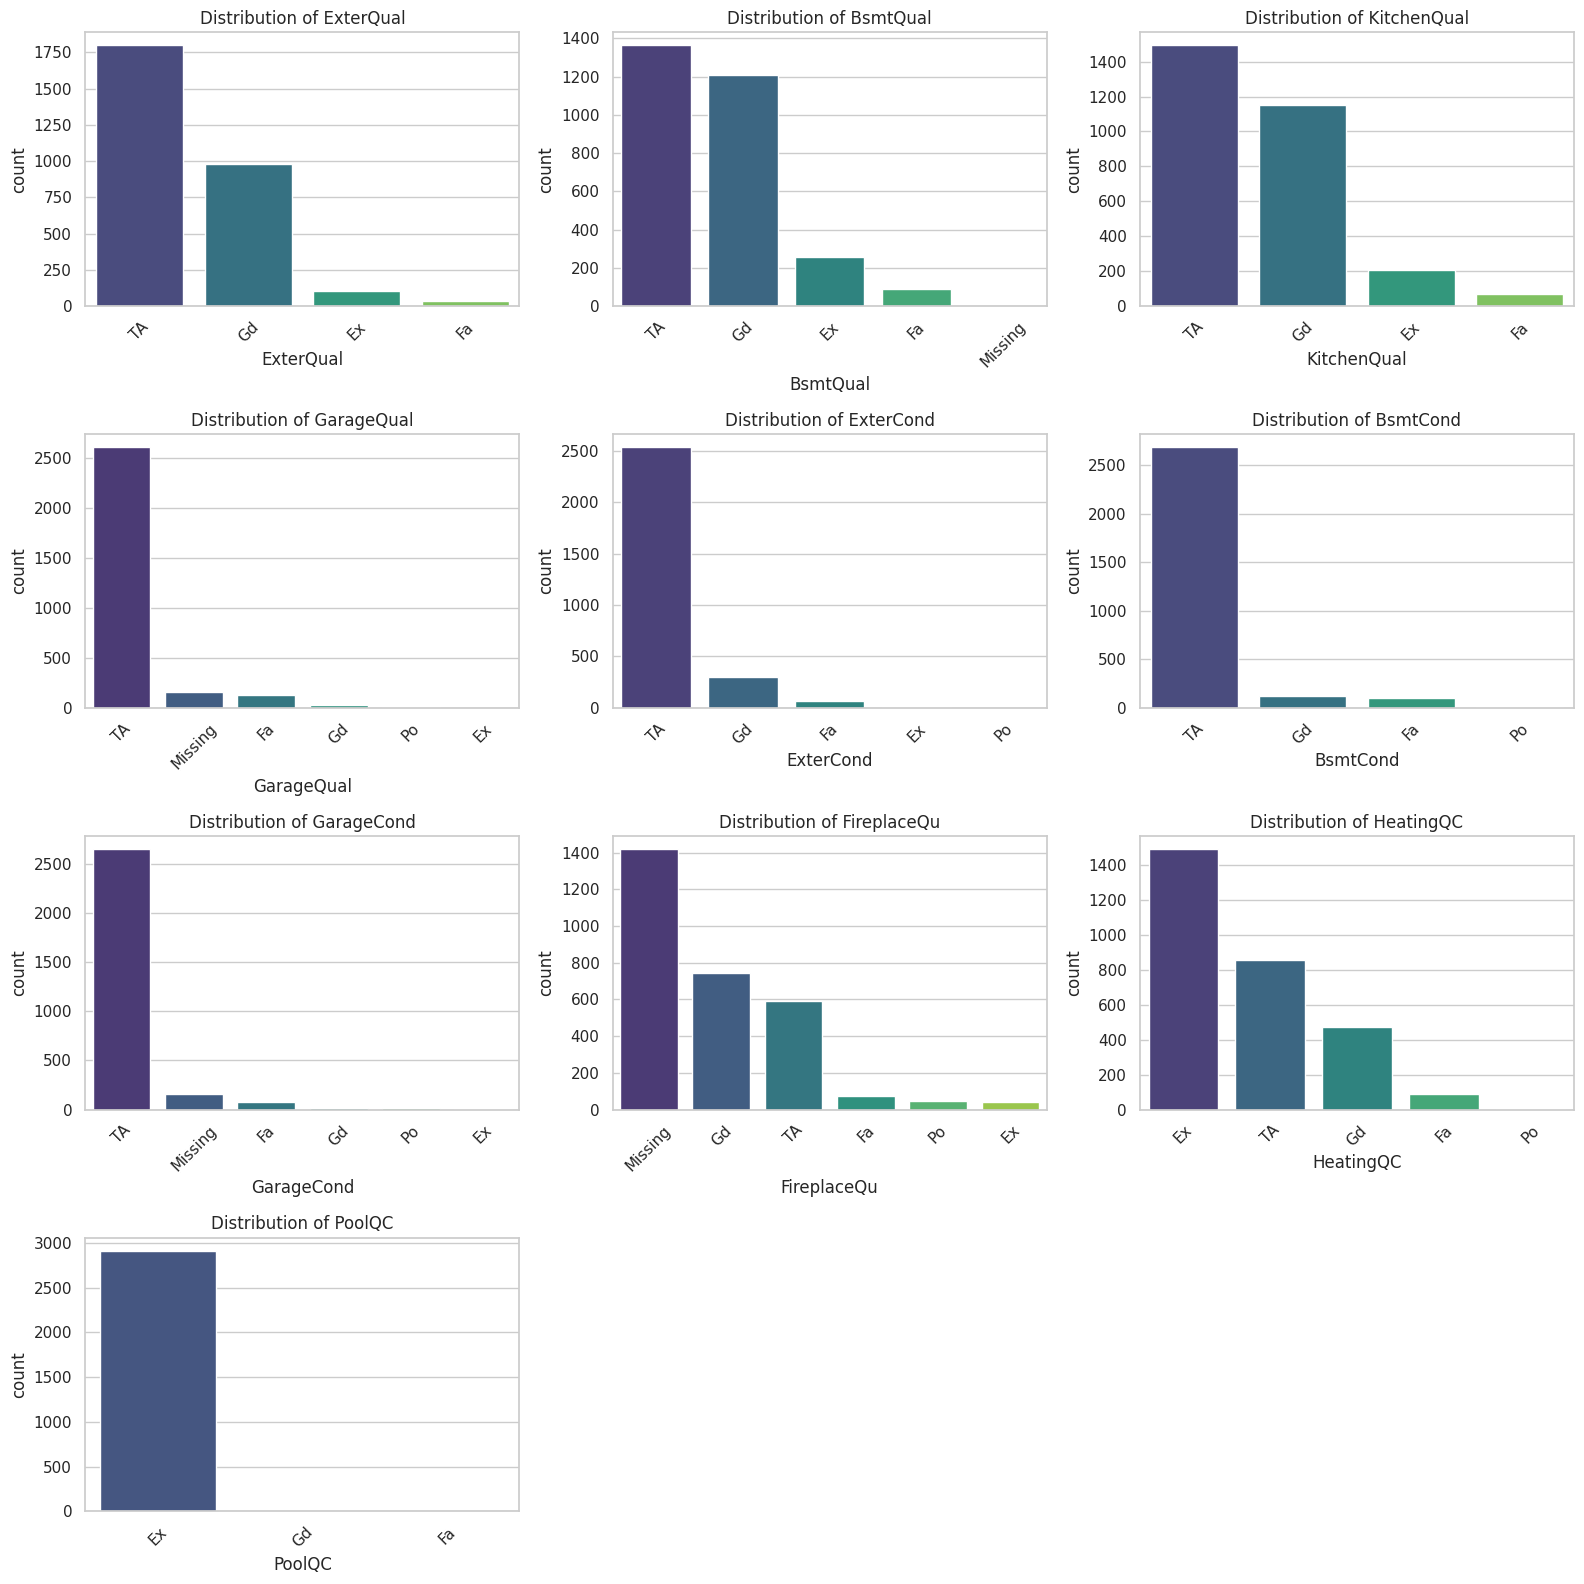

In [52]:

Qcolumns = [
    "ExterQual", "BsmtQual", "KitchenQual", "GarageQual",
    "ExterCond", "BsmtCond", "GarageCond", "FireplaceQu",
    "HeatingQC", "PoolQC"
]


n_cols = 3
n_rows = (len(Qcolumns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))  # Adjust figure size
axes = axes.flatten()


for i, col in enumerate(Qcolumns):
    if col in data.columns:
        sns.countplot(ax=axes[i], x=data[col], palette="viridis", order=data[col].value_counts().index)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    else:
        axes[i].set_visible(False)


for j in range(len(Qcolumns), len(axes)):
    fig.delaxes(axes[j])  # Remove empty subplots


plt.tight_layout()
plt.show()


These are the Columns that have quality significance where missing is a ligit Value

In [53]:


for col in Qcolumns:
    if col in data.columns:
        if 'Missing' in data[col].value_counts().index:
            data[col] = data[col].map({"Missing": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})
        else:
            data[col] = data[col].map({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})

print(data[Qcolumns].head())

   ExterQual  BsmtQual  KitchenQual  GarageQual  ExterCond  BsmtCond  \
0          4         4            4           3          3         3   
1          3         4            3           3          3         3   
2          4         4            4           3          3         3   
3          3         3            4           3          3         4   
4          4         4            4           3          3         3   

   GarageCond  FireplaceQu  HeatingQC  PoolQC  
0           3            0          5       5  
1           3            3          5       5  
2           3            3          5       5  
3           3            4          4       5  
4           3            3          5       5  


In [54]:
data.shape

(2919, 68)

<ipython-input-55-b7978dcaf0fd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i], x=data[col], palette="viridis", order=data[col].value_counts().index)
<ipython-input-55-b7978dcaf0fd>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
<ipython-input-55-b7978dcaf0fd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[i], x=data[col], palette="viridis", order=data[col].value_counts().index)
<ipython-input-55-b7978dcaf0fd>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks

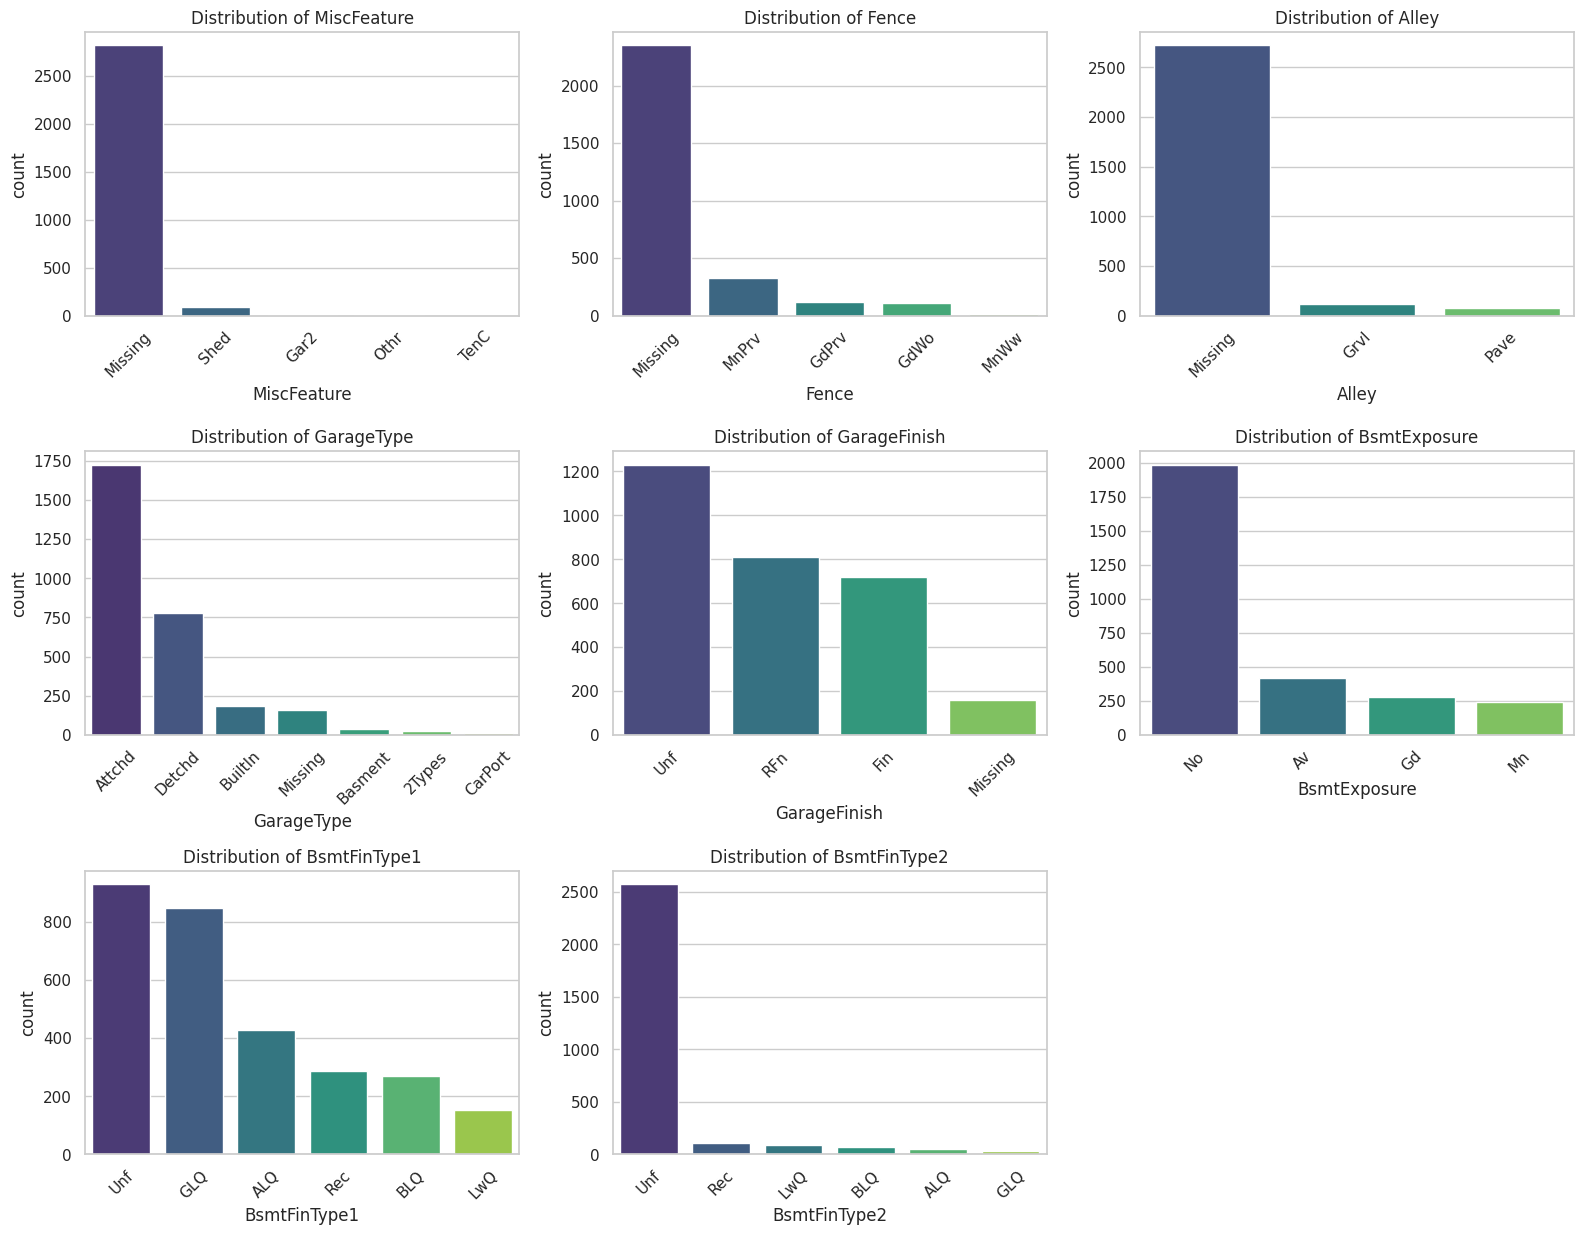

In [55]:
Mcolumns =['MiscFeature', 'Fence', 'Alley', 'GarageType', 'GarageFinish',  'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtFinSF1', 'BsmtUnfSF']

n_cols = 3
n_rows = (len(Mcolumns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))  # Adjust figure size
axes = axes.flatten()


for i, col in enumerate(Mcolumns):
    if col in data.columns:
        sns.countplot(ax=axes[i], x=data[col], palette="viridis", order=data[col].value_counts().index)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    else:
        axes[i].set_visible(False)


for j in range(len(Mcolumns), len(axes)):
    fig.delaxes(axes[j])  # Remove empty subplots

plt.tight_layout()
plt.show()

In [56]:
data['BsmtExposure'] = data['BsmtExposure'].map({"Missing": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype('int')
data['BsmtFinType1'] = data['BsmtFinType1'].map({"Missing": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}).astype('int')
data['BsmtFinType2'] = data['BsmtFinType2'].map({"Missing": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}).astype('int')
data['GarageFinish'] = data['GarageFinish'].map({"Missing": 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype('int')
data['Fence'] = data['Fence'].map({"Missing": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype('int')

In [57]:
data.head()

MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0    4.110874       RL     4.189655  9.042040   Pave  Missing      Reg   
1    3.044522       RL     4.394449  9.169623   Pave  Missing      Reg   
2    4.110874       RL     4.234107  9.328212   Pave  Missing      IR1   
3    4.262680       RL     4.110874  9.164401   Pave  Missing      IR1   
4    4.110874       RL     4.442651  9.565284   Pave  Missing      IR1   

  LandContour Utilities LotConfig  ... MiscFeature MiscVal SaleType  \
0         Lvl    AllPub    Inside  ...     Missing     0.0       WD   
1         Lvl    AllPub       FR2  ...     Missing     0.0       WD   
2         Lvl    AllPub    Inside  ...     Missing     0.0       WD   
3         Lvl    AllPub    Corner  ...     Missing     0.0       WD   
4         Lvl    AllPub       FR2  ...     Missing     0.0       WD   

  SaleCondition SalePrice TotalBsmtFinishedSF  TotalBsmtArea  TotalFlrSF  \
0        Normal  208500.0           26.570661      29.257478    7.444833   
1        Normal  181500.0           31.272992      35.524639    7.141245   
2        Normal  223500.0           22.045408      30.331502    7.488294   
3       Abnorml  140000.0           14.696938      27.495454    7.448916   
4        Normal  250000.0           25.592968      33.837849    7.695758   

   totalbaths  totalporchsf  
0         3.5      7.810250  
1         2.5     17.262677  
2         3.5      6.480741  
3         2.0     17.521415  
4         3.5     16.613248  

[5 rows x 68 columns]

**Features with ranks**

In [58]:
data['LotShape'] = data['LotShape'].map({"IR3": 1, "IR2": 2, "IR1": 3, "Reg": 4}).astype('int')
data['LandContour'] = data['LandContour'].map({"Low": 1, "Bnk": 2, "HLS": 3, "Lvl": 4}).astype('int')
data['Utilities'] = data['Utilities'].map({"ELO": 1, "NoSeWa": 2, "NoSewr": 3, "AllPub": 4}).astype('int')
data['LandSlope'] = data['LandSlope'].map({"Sev": 1, "Mod": 2, "Gtl": 3}).astype('int')
data['CentralAir'] = data['CentralAir'].map({"N": 0, "Y": 1}).astype('int')
data['PavedDrive'] = data['PavedDrive'].map({"N": 0, "P": 1, "Y": 2}).astype('int')


The Rest



In [59]:
columns_to_encode = [
    'MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1',
    'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
    'Electrical', 'Functional', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'
]

data_dummies = pd.get_dummies(data[columns_to_encode], drop_first=True)

data.drop(columns_to_encode, axis=1, inplace=True)

data = pd.concat([data, data_dummies], axis=1)

print(data.head())


   MSSubClass  LotFrontage   LotArea  LotShape  LandContour  Utilities  \
0    4.110874     4.189655  9.042040         4            4          4   
1    3.044522     4.394449  9.169623         4            4          4   
2    4.110874     4.234107  9.328212         3            4          4   
3    4.262680     4.110874  9.164401         3            4          4   
4    4.110874     4.442651  9.565284         3            4          4   

   LandSlope  OverallQual  OverallCond  YearBuilt  ...  SaleType_ConLI  \
0          3            7     1.791759   2.236068  ...           False   
1          3            6     2.197225   5.567764  ...           False   
2          3            7     1.791759   2.645751  ...           False   
3          3            7     1.791759   9.539392  ...           False   
4          3            8     1.791759   2.828427  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False   

We wanted to visulaze somecorrelations and changes before the modeling to check our data preperation process

Correlation with 'SalePrice':
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenA

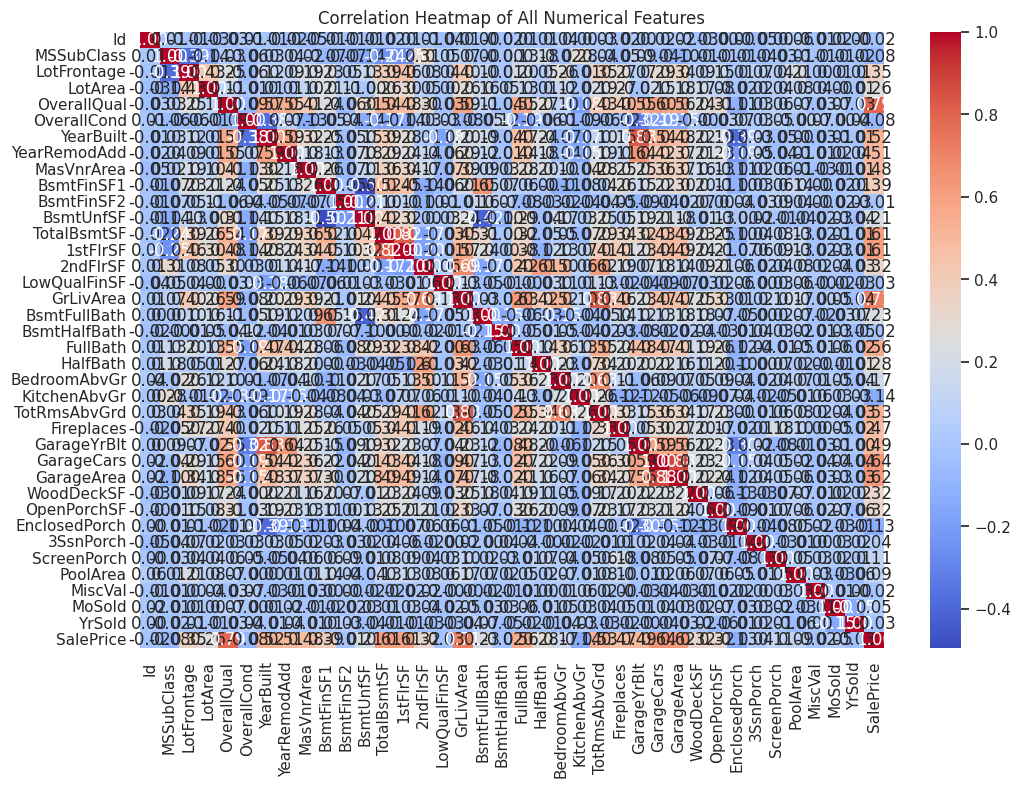

In [60]:

correlation_with_saleprice = corr_matrix['SalePrice'].sort_values(ascending=False)

print("Correlation with 'SalePrice':")
print(correlation_with_saleprice)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of All Numerical Features")
plt.show()

In [61]:
abs_correlations = corr_matrix['SalePrice'].abs().sort_values(ascending=False)

print("All Correlations with SalePrice (Sorted by Absolute Value):")
print(abs_correlations)


All Correlations with SalePrice (Sorted by Absolute Value):
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
Bsmt

we will need to drop some colums because there many irrelavnt ones

In [62]:
data.shape

(2919, 194)

In [63]:
rows_with_saleprice = data['SalePrice'].notna().sum()
rows_without_saleprice = data['SalePrice'].isna().sum()

print(f"Number of rows with 'SalePrice': {rows_with_saleprice}")
print(f"Number of rows without 'SalePrice': {rows_without_saleprice}")


Number of rows with 'SalePrice': 1460
Number of rows without 'SalePrice': 1459


In [64]:
saleprice_notna_indices = data.index[data['SalePrice'].notna()].tolist()

differences = [saleprice_notna_indices[i+1] - saleprice_notna_indices[i] for i in range(len(saleprice_notna_indices) - 1)]

successive = all(diff == 1 for diff in differences)

# Output result
if successive:
    print("Rows with 'SalePrice' values are successive.")
else:
    print("Rows with 'SalePrice' values are not successive.")

Rows with 'SalePrice' values are successive.


We need to Split train and test data


In [65]:
test = data[data['SalePrice'].isna()]
train = data[data['SalePrice'].notna()]

y = train['SalePrice']

train = train.drop(['SalePrice'], axis=1)

test = test.drop(['SalePrice'], axis=1)

print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)
print("Target variable (y) shape:", y.shape)


Train dataset shape: (1460, 193)
Test dataset shape: (1459, 193)
Target variable (y) shape: (1460,)


In [66]:
train.shape

(1460, 193)

In [67]:
test.shape

(1459, 193)

In [68]:
y.shape

(1460,)

In [69]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

**Data Scaling**


 Data scaling is a crucial preprocessing step that adjusts the range of feature values to a consistent scale. This ensures that all features contribute equally to the model's learning process, enhancing efficiency and improving performance. By standardizing or normalizing feature values, data scaling helps the model learn patterns more effectively and prevents dominance by features with larger magnitudes.

 Standard Scaling
Standard Scaling is a method of feature scaling that transforms data to have a mean of 0 and a standard deviation of 1. This process ensures that all features are centered and scaled relative to their variability, making them comparable.

Formula:

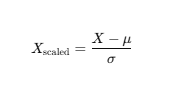



Where:

* X: Original value.

* μ: Mean of the feature.

* σ: Standard deviation of the feature.

In [70]:
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_scaled = scaler.transform(test)
# Standardize the target variable (y)
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  # Reshape y for compatibility with the scaler
y_val = scaler_y.transform(y_val.values.reshape(-1, 1))


In [71]:
print(y)

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64


**Deep MLP Architecture**

In [72]:
deep_mlp_model = Sequential([
    Dense(512, activation='swish', input_shape=(X_train.shape[1],), kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='swish', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='swish', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='swish', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Dense(1)  # Output layer for regression
])

deep_mlp_model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Train the model
history_deep_mlp = deep_mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,  # Adjusted batch size for balance between stability and performance
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 2.4902 - mean_absolute_error: 1.1469 - val_loss: 0.7984 - val_mean_absolute_error: 0.5741 - learning_rate: 0.0010
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9824 - mean_absolute_error: 0.7195 - val_loss: 0.4592 - val_mean_absolute_error: 0.4254 - learning_rate: 0.0010
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6981 - mean_absolute_error: 0.5924 - val_loss: 0.4356 - val_mean_absolute_error: 0.3843 - learning_rate: 0.0010
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6155 - mean_absolute_error: 0.5261 - val_loss: 0.4461 - val_mean_absolute_error: 0.3975 - learning_rate: 0.0010
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.4987 - mean_absolute_error: 0.4772 - val_loss: 0.3237 - val_mean_absolute_error: 0.3043 - learning_rate: 0.0010
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5178 - mean_absolute_error: 0.4721 - val_loss: 0.3874 - val_mean_ab

**Deep MLP Architecture with K-Fold cross-validation**

K-Fold cross-validation divides the data into k parts, rotating through training and validation sets, while a single split uses a fixed partition. K-Fold provides better generalization by evaluating on multiple splits, reducing bias and variance, and ensuring all data is used for both training and validation. This makes it more reliable for small datasets and critical evaluations, though it is computationally expensive as it trains k models. A single split is faster, training just one model, but is prone to bias and less representative if the split is not ideal. K-Fold is preferred for robust evaluation, while a single split suits quick experiments or large datasets.



In [73]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_index, val_index in kf.split(X_train):
    print(f"Training fold {fold}")
    fold += 1

    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]  # Use array indexing instead of .iloc

    deep_mlp_model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=['mean_absolute_error'])

    history = deep_mlp_model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=32,
        callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
        verbose=1
    )

    val_loss = deep_mlp_model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Fold validation loss: {val_loss}")


Training fold 1
Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.2490 - mean_absolute_error: 0.2784 - val_loss: 0.1915 - val_mean_absolute_error: 0.2146
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2863 - mean_absolute_error: 0.3016 - val_loss: 0.1780 - val_mean_absolute_error: 0.1948
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2645 - mean_absolute_error: 0.2888 - val_loss: 0.2493 - val_mean_absolute_error: 0.2767
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2653 - mean_absolute_error: 0.2916 - val_loss: 0.1828 - val_mean_absolute_error: 0.2044
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2767 - mean_absolute_error: 0.2978 - val_loss: 0.1560 - val_mean_absolute_error: 0.1711
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3661 - mean_absolute_error: 0.3096 - val_loss: 0.1917 - val_mean_absolute_error: 0.2102
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2731 - mean_absolute_e

We want to see that the deep_mlp_model is working

In [74]:
y_pred_scaled = deep_mlp_model.predict(X_val)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print(y_pred)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[149355.73 ]
 [324701.03 ]
 [108658.55 ]
 [166218.83 ]
 [320389.25 ]
 [ 59452.934]
 [237361.95 ]
 [144222.3  ]
 [ 57426.207]
 [132195.53 ]
 [137127.45 ]
 [131004.51 ]
 [106151.55 ]
 [194233.16 ]
 [165947.03 ]
 [139394.5  ]
 [186229.88 ]
 [133130.95 ]
 [112292.6  ]
 [219370.2  ]
 [158873.64 ]
 [210237.73 ]
 [171256.08 ]
 [134731.66 ]
 [208415.67 ]
 [155645.81 ]
 [190249.92 ]
 [120400.35 ]
 [172891.08 ]
 [172894.38 ]
 [139949.61 ]
 [278819.78 ]
 [204352.28 ]
 [121117.37 ]
 [264440.78 ]
 [149775.9  ]
 [133555.92 ]
 [196766.97 ]
 [335241.4  ]
 [ 98073.65 ]
 [122588.55 ]
 [222313.5  ]
 [118835.12 ]
 [336750.2  ]
 [134568.53 ]
 [128516.33 ]
 [114284.414]
 [137017.88 ]
 [352462.7  ]
 [131335.58 ]
 [122186.14 ]
 [233500.11 ]
 [ 98020.77 ]
 [303206.22 ]
 [173045.88 ]
 [236709.9  ]
 [197697.88 ]
 [165820.6  ]
 [139971.95 ]
 [103554.35 ]
 [ 81575.73 ]
 [158299.69 ]
 [301623.94 ]
 [236998.11 ]
 [277000.78 ]
 [182200.36 ]
 [104568.266]
 [310401.72 ]
 [149514

Wide MLP Architecture

In [75]:
wide_mlp_model = Sequential([
        Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.4),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dense(1)  # Output layer for regression
 ])

wide_mlp_model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Train on this fold
history_wide_mlp = wide_mlp_model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=64,  # Larger batch size
        callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
        verbose=1
    )

print(f"Fold validation loss: {val_loss}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.8572 - mean_absolute_error: 0.6734 - val_loss: 0.3943 - val_mean_absolute_error: 0.5180
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3932 - mean_absolute_error: 0.4348 - val_loss: 0.2228 - val_mean_absolute_error: 0.3107
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2040 - mean_absolute_error: 0.2975 - val_loss: 0.2115 - val_mean_absolute_error: 0.2900
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1812 - mean_absolute_error: 0.2866 - val_loss: 0.1475 - val_mean_absolute_error: 0.2732
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1255 - mean_absolute_error: 0.2617 - val_loss: 0.1436 - val_mean_absolute_error: 0.2454
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1111 - mean_absolute_error: 0.2364 - val_loss: 0.1380 - val_mean_absolute_error: 0.2423
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.1005 - mean_absolute_error: 0.2209 - val_loss: 0.1

We want to see that the wide_mlp_model is working

In [76]:
wide_mlp_pred_scaled = wide_mlp_model.predict(X_val)
wide_mlp_predictions = scaler_y.inverse_transform(wide_mlp_pred_scaled)

print("Wide MLP Predictions:\n", wide_mlp_predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Wide MLP Predictions:
 [[149695.33 ]
 [334815.4  ]
 [116218.02 ]
 [158727.88 ]
 [316071.53 ]
 [100032.54 ]
 [230300.2  ]
 [162432.22 ]
 [ 97095.086]
 [142451.83 ]
 [150715.69 ]
 [136182.42 ]
 [139959.4  ]
 [200136.16 ]
 [171719.86 ]
 [147613.11 ]
 [187770.22 ]
 [144223.61 ]
 [140183.8  ]
 [224124.6  ]
 [165483.94 ]
 [208263.02 ]
 [191337.88 ]
 [145088.97 ]
 [208630.08 ]
 [158166.98 ]
 [197995.86 ]
 [121402.984]
 [180374.92 ]
 [176356.39 ]
 [137905.27 ]
 [282463.22 ]
 [203062.6  ]
 [126616.38 ]
 [260858.95 ]
 [153111.45 ]
 [150788.81 ]
 [206778.6  ]
 [327054.62 ]
 [116094.48 ]
 [140847.31 ]
 [232569.92 ]
 [123434.09 ]
 [355792.62 ]
 [138570.92 ]
 [136860.25 ]
 [128848.29 ]
 [139183.88 ]
 [423578.94 ]
 [146536.14 ]
 [135861.06 ]
 [239083.08 ]
 [133576.39 ]
 [272144.25 ]
 [164545.   ]
 [249180.02 ]
 [203758.83 ]
 [180034.8  ]
 [153361.31 ]
 [112208.86 ]
 [ 93554.31 ]
 [168033.8  ]
 [301812.22 ]
 [235414.16 ]
 [279221.53 ]
 [181234.73 ]
 [122200.086]


Convolutional Neural Network (CNN)

In [77]:
X_train_cnn = X_train_fold.reshape(-1, X_train_fold.shape[1], 1)
X_val_cnn = X_val_fold.reshape(-1, X_val_fold.shape[1], 1)

cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output layer
])

cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train on this fold
history_cnn = cnn_model.fit(
    X_train_cnn, y_train_fold,
    validation_data=(X_val_cnn, y_val_fold),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)],
    verbose=1
)

val_loss = cnn_model.evaluate(X_val_cnn, y_val_fold, verbose=0)
print(f"Fold validation loss: {val_loss}")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.6598 - mean_absolute_error: 0.5415 - val_loss: 0.2329 - val_mean_absolute_error: 0.3172
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2427 - mean_absolute_error: 0.3510 - val_loss: 0.1918 - val_mean_absolute_error: 0.3015
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2207 - mean_absolute_error: 0.3285 - val_loss: 0.2335 - val_mean_absolute_error: 0.2852
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1638 - mean_absolute_error: 0.2824 - val_loss: 0.2094 - val_mean_absolute_error: 0.2800
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1417 - mean_absolute_error: 0.2719 - val_loss: 0.1854 - val_mean_absolute_error: 0.2650
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1227 - mean_absolute_error: 0.2497 - val_loss: 0.1836 - val_mean_absolute_error: 0.2728
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1293 - mean_absolute_error: 0.2584 - val_loss: 0.1

We want to see that cnn_model is working

In [78]:
cnn_pred_scaled = cnn_model.predict(X_val_cnn)
cnn_predictions = scaler_y.inverse_transform(cnn_pred_scaled)

print("CNN Predictions:\n", cnn_predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
CNN Predictions:
 [[178902.78 ]
 [169832.25 ]
 [147294.14 ]
 [ 98336.27 ]
 [189560.16 ]
 [150220.7  ]
 [146353.44 ]
 [257426.7  ]
 [145342.83 ]
 [139321.   ]
 [206813.1  ]
 [179156.53 ]
 [165076.53 ]
 [138674.25 ]
 [149842.78 ]
 [323113.78 ]
 [146512.2  ]
 [318154.34 ]
 [321232.9  ]
 [240844.9  ]
 [239632.55 ]
 [193411.89 ]
 [183447.38 ]
 [141666.3  ]
 [244036.27 ]
 [179850.72 ]
 [243716.7  ]
 [281519.3  ]
 [150464.06 ]
 [208632.67 ]
 [166552.56 ]
 [411471.9  ]
 [188460.75 ]
 [304503.47 ]
 [173303.55 ]
 [127164.914]
 [116899.55 ]
 [224074.61 ]
 [127419.734]
 [217019.2  ]
 [244596.12 ]
 [167768.84 ]
 [195760.25 ]
 [278316.53 ]
 [251472.81 ]
 [181538.97 ]
 [264440.8  ]
 [238634.73 ]
 [114987.28 ]
 [161780.89 ]
 [151268.62 ]
 [174970.27 ]
 [152801.89 ]
 [110771.19 ]
 [211120.86 ]
 [149200.34 ]
 [201794.75 ]
 [136059.83 ]
 [140105.05 ]
 [177315.27 ]
 [181590.64 ]
 [242209.7  ]
 [157961.72 ]
 [178916.83 ]
 [220708.83 ]
 [180366.69 ]
 [133482.12 ]
 [1670

Recurrent Neural Network (RNN)

In [79]:
X_train_rnn = X_train_fold.reshape(-1, X_train_fold.shape[1], 1)
X_val_rnn = X_val_fold.reshape(-1, X_val_fold.shape[1], 1)

rnn_model = Sequential([
    LSTM(128, activation='relu', input_shape=(X_train_rnn.shape[1], 1), return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(1e-4)),
    Dense(1)  # Output layer
])

rnn_model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

history_rnn = rnn_model.fit(
    X_train_rnn, y_train_fold,
    validation_data=(X_val_rnn, y_val_fold),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

val_loss = rnn_model.evaluate(X_val_rnn, y_val_fold, verbose=0)
print(f"Fold validation loss: {val_loss}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 35s 833ms/step - loss: 0.9746 - mean_absolute_error: 0.7247 - val_loss: 0.8783 - val_mean_absolute_error: 0.6842 - learning_rate: 0.0010
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 921ms/step - loss: 0.8215 - mean_absolute_error: 0.6744 - val_loss: 0.8747 - val_mean_absolute_error: 0.6709 - learning_rate: 0.0010
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 452ms/step - loss: 0.7567 - mean_absolute_error: 0.6385 - val_loss: 0.8717 - val_mean_absolute_error: 0.6711 - learning_rate: 0.0010
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 416ms/step - loss: 0.8137 - mean_absolute_error: 0.6536 - val_loss: 60839951524879839264768.0000 - val_mean_absolute_error: 21764497408.0000 - learning_rate: 0.0010
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 457ms/step - loss: 0.9469 - mean_absolute_error: 0.6848 - val_loss: 0.8880 - val_mean_absolute_error: 0.6728 - learning_rate: 0.0010
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 420ms/step - loss: 0.9841 - mean_absolute_err

We want to see that rnn_model is working

In [80]:
# Predictions from RNN Model
rnn_pred_scaled = rnn_model.predict(X_val_rnn)
rnn_predictions = scaler_y.inverse_transform(rnn_pred_scaled)

# Display predictions from RNN Model
print("RNN Predictions:\n", rnn_predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step
RNN Predictions:
 [[177139.34]
 [177120.38]
 [180073.27]
 [176084.02]
 [176461.62]
 [176466.86]
 [177140.61]
 [183857.84]
 [177135.12]
 [175866.52]
 [177123.47]
 [177120.48]
 [176143.6 ]
 [176279.75]
 [177135.1 ]
 [177127.16]
 [176149.33]
 [184333.6 ]
 [177132.33]
 [178661.27]
 [184305.61]
 [177133.31]
 [177123.47]
 [175997.48]
 [178672.3 ]
 [176056.1 ]
 [177139.34]
 [177120.39]
 [176454.48]
 [177124.44]
 [175842.45]
 [183843.7 ]
 [177127.11]
 [177127.16]
 [177124.47]
 [178513.55]
 [175444.73]
 [184323.7 ]
 [181061.56]
 [177127.12]
 [184333.61]
 [176140.14]
 [177102.23]
 [184305.62]
 [181160.11]
 [178442.45]
 [177133.47]
 [177127.16]
 [177099.73]
 [176291.4 ]
 [176466.66]
 [176716.12]
 [176671.97]
 [176460.9 ]
 [177139.34]
 [177120.39]
 [177139.34]
 [176462.39]
 [176304.8 ]
 [177139.33]
 [176296.17]
 [177105.73]
 [176458.97]
 [178471.86]
 [176454.52]
 [177139.34]
 [177121.7 ]
 [176259.36]
 [176462.53]
 [176467.48]
 [175790.48]
 [178394.39]
 [17628

We want to visualise the training loss and validation loss for each model

In [81]:
def plot_history(history, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label=f'{model_name} Training Loss')
    plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss')
    plt.title(f'{model_name} Loss During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()



In [82]:
def plot_mae(history, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['mean_absolute_error'], label=f'{model_name} Training MAE')
    plt.plot(history.history['val_mean_absolute_error'], label=f'{model_name} Validation MAE')
    plt.title(f'{model_name} Mean Absolute Error During Training')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid()
    plt.show()



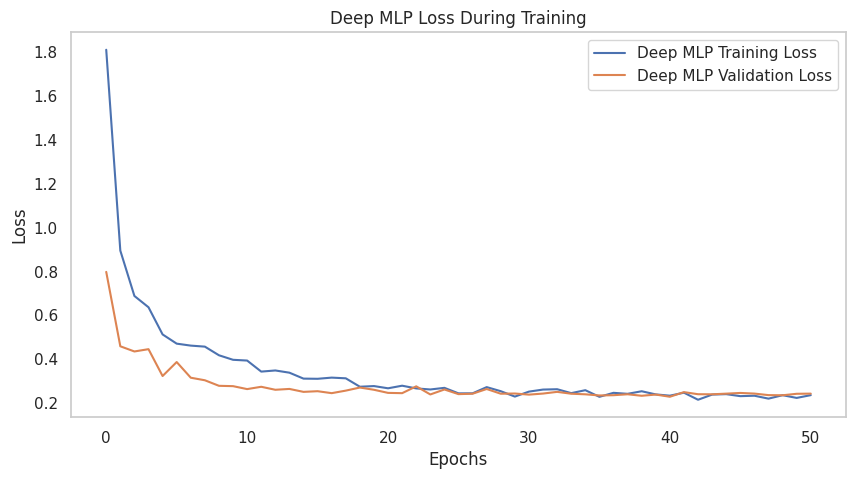

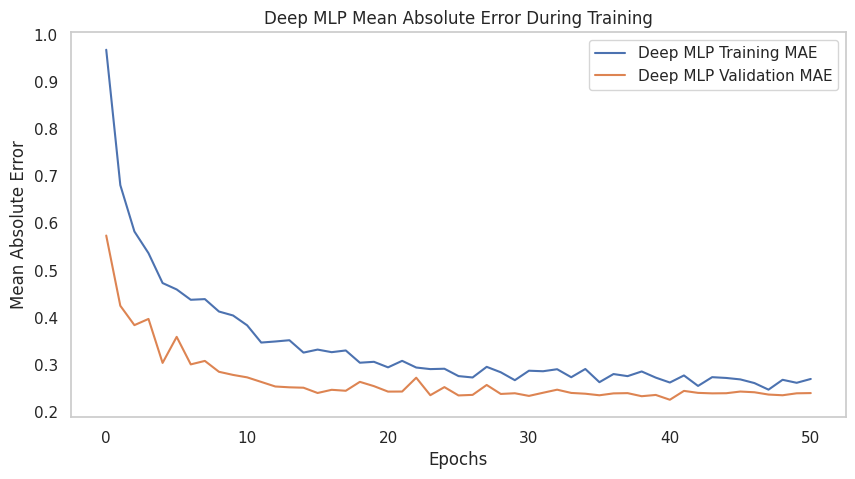

In [83]:
plot_history(history_deep_mlp, "Deep MLP")
plot_mae(history_deep_mlp, "Deep MLP")

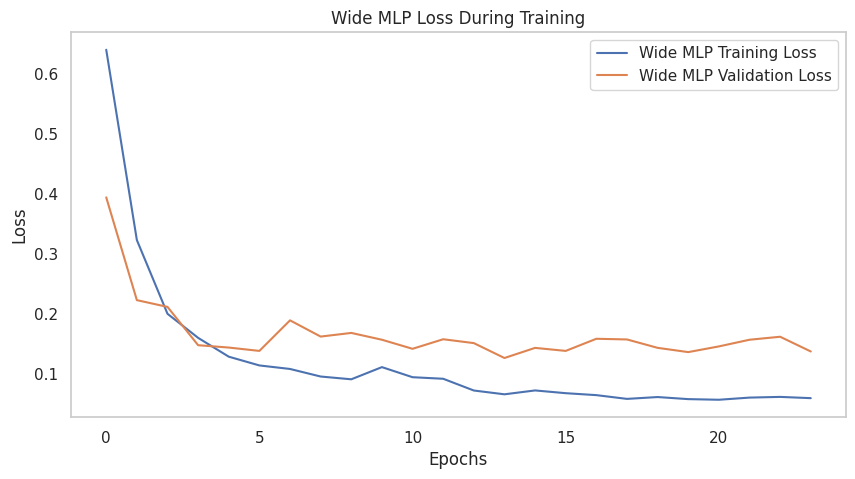

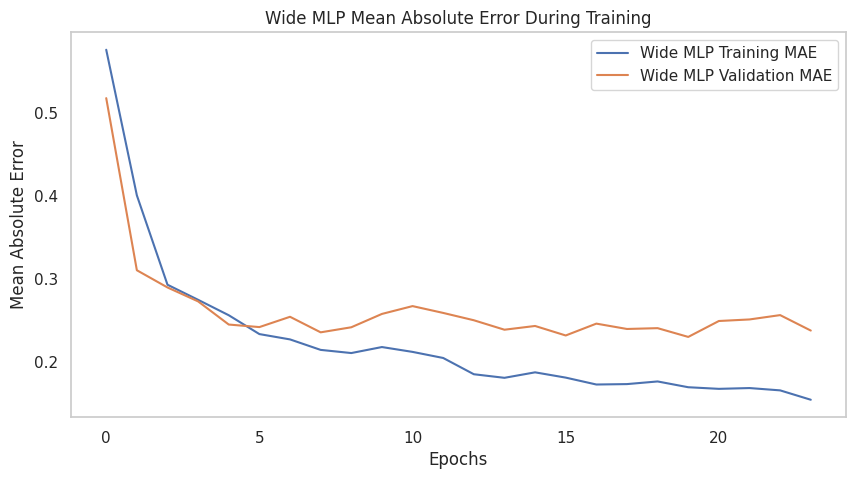

In [84]:
plot_history(history_wide_mlp, "Wide MLP")
plot_mae(history_wide_mlp, "Wide MLP")

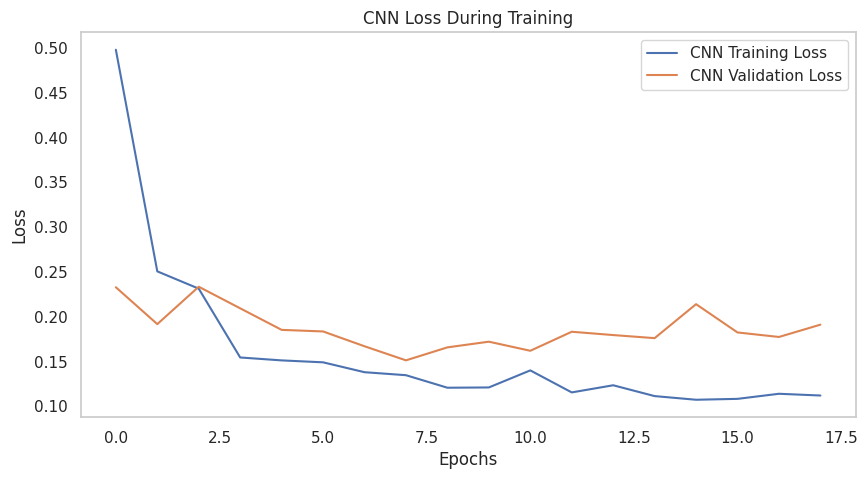

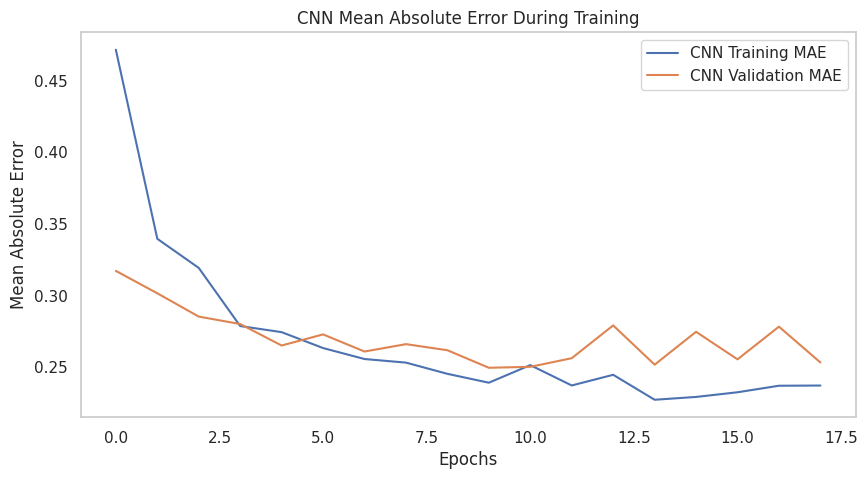

In [85]:
plot_history(history_cnn, "CNN")
plot_mae(history_cnn, "CNN")

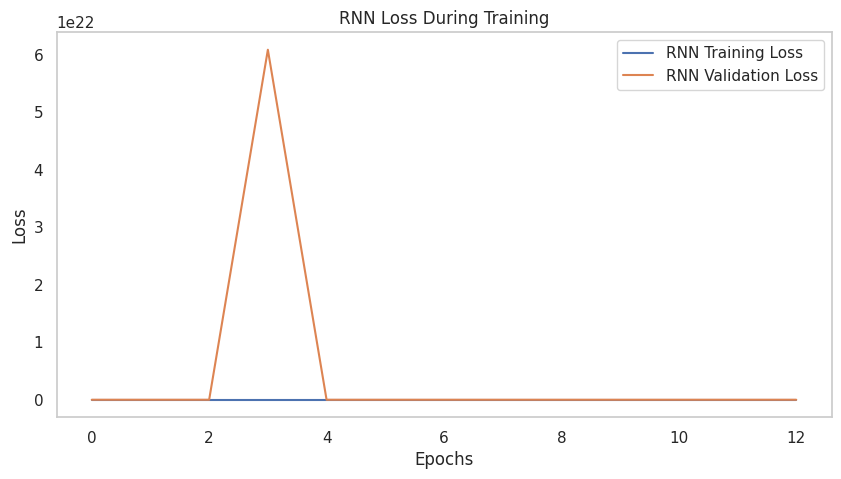

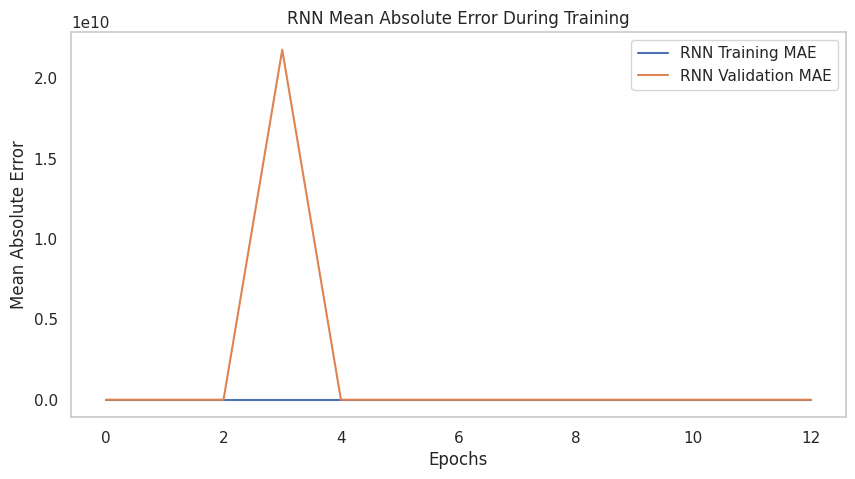

In [86]:
plot_history(history_rnn, "RNN")
plot_mae(history_rnn, "RNN")

And now let's see the predictions for each one

In [87]:

mlp_deep_pred_scaled = deep_mlp_model.predict(test_scaled).flatten()
mlp_deep_predictions = scaler_y.inverse_transform(mlp_deep_pred_scaled.reshape(-1, 1)).flatten()

mlp_wide_pred_scaled = wide_mlp_model.predict(test_scaled).flatten()
mlp_wide_predictions = scaler_y.inverse_transform(mlp_wide_pred_scaled.reshape(-1, 1)).flatten()

cnn_pred_scaled = cnn_model.predict(test_scaled.reshape(-1, test_scaled.shape[1], 1)).flatten()
cnn_predictions = scaler_y.inverse_transform(cnn_pred_scaled.reshape(-1, 1)).flatten()
rnn_pred_scaled = rnn_model.predict(test_scaled.reshape(-1, test_scaled.shape[1], 1)).flatten()
rnn_predictions = scaler_y.inverse_transform(rnn_pred_scaled.reshape(-1, 1)).flatten()


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step


## Kaggle Competition Predictions and Results

Since we explored multiple architectures, including **Deep MLP**, **Wide MLP**, **CNN**, and **RNN**, to generate predictions for the Kaggle competition. Each model's predictions were scaled back to their original values using inverse transformations. Here's an overview of the process:

### Individual Model Predictions

- **Deep MLP**:
  - Achieved the highest Kaggle score of **7.07**, highlighting its ability to generalize well for house price prediction.

- **RNN**:
  - Produced a more moderate score of **0.46**, showing reasonable performance but limited by the nature of the dataset, which lacked strong sequential dependencies.

- **Wide MLP and CNN**:
  - Also evaluated, yielding competitive scores, though slightly below Deep MLP.

### Combination of Model Predictions

We experimented with combining predictions from multiple models, including:
1. **Averaging predictions from all models.**
2. **Assigning higher weights to Deep MLP predictions** given its superior performance.
3. **Using other ensemble strategies** like stacking or blending.

These approaches aimed to improve overall performance by leveraging the strengths of each model. However, the results varied, with some combinations underperforming compared to individual models like **Deep MLP**.

### Key Takeaways
- **Deep MLP Dominance**: This model outperformed others, making it the backbone of our final predictions.
- **Experimentation with Combinations**: While combinations showed promise, they did not consistently outperform the best single model.
- **RNN's Moderate Results**: RNN struggled due to the lack of strong sequential patterns in the dataset.


In [88]:
final_predictions = (
rnn_predictions

)


In [89]:

# Save final predictions
output = pd.DataFrame({'Id': test.index + 1461, 'SalePrice': final_predictions})
output.to_csv('submission.csv', index=False)


In [90]:
print(mlp_wide_predictions)


[145148.56 172738.73 194736.86 ... 164161.52 140948.08 208958.52]


let's donload it forsubmission

In [91]:
try:

    files.download('submission.csv')
except:
    print("File saved as 'submission.csv'.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Kaggle Competition Predictions and Results

For this project, we explored multiple architectures, including **Deep MLP**, **Wide MLP**, **CNN**, and **RNN**, to generate predictions for the Kaggle competition. Each model's predictions were scaled back to their original values using inverse transformations. Here's an overview of the process:

### Individual Model Predictions

- **Deep MLP**:
  - Achieved the highest Kaggle score of **7.07**, highlighting its ability to generalize well for house price prediction.

- **RNN**:
  - Produced a more moderate score of **0.46**, showing reasonable performance but limited by the nature of the dataset, which lacked strong sequential dependencies.

- **Wide MLP and CNN**:
  - Also evaluated, yielding competitive scores, though slightly below Deep MLP.

### Combination of Model Predictions

We experimented with combining predictions from multiple models, including:
1. **Averaging predictions from all models.**
2. **Assigning higher weights to Deep MLP predictions** given its superior performance.
3. **Using other ensemble strategies** like stacking or blending.

These approaches aimed to improve overall performance by leveraging the strengths of each model. However, the results varied, with some combinations underperforming compared to individual models like **Deep MLP**.

### Key Takeaways
- **Deep MLP Dominance**: This model outperformed others, making it the backbone of our final predictions.
- **Experimentation with Combinations**: While combinations showed promise, they did not consistently outperform the best single model.
- **RNN's Moderate Results**: RNN struggled due to the lack of strong sequential patterns in the dataset.
